# PROJECT TITLE: Unveiling Segments in Social Networks

## Problem Statement ##

Businesses face significant challenges in understanding and leveraging the complex dynamics of social media interactions and community structures to engage effectively with their target audiences.

**Objective:**

  Develop a system that automatically analyzes social media networks to identify and cluster communities, providing actionable insights that help businesses:

  **Audience Segmentation:** Identify clusters of users with similar interests, behaviors, or demographics for targeted marketing strategies.

  **Influencer Identification**: Discover influential users within specific communities to enhance influencer marketing efforts.

  **Community Engagement**: Understand social network structures and user interactions to foster genuine community engagement and build brand trust.


**Machine Learning Problem**:

  In this problem, we aim to build Machine Learning models in order to cluster several social media users together. This is an unsupervised learning problem.  We are going to work with a special kind of data called **Graph Data.**

**About The Dataset:**

  graph data represents relationships between entities. Imagine social networks like Facebook or Twitter, where users are connected to each other through friendships or follows. E**ach user is a node in the graph**, and the **connections between them are edges**. This structure allows us to model complex relationships and interactions in a way that traditional tabular data cannot capture.

**Fundamentals of Graph Representation:**

  **Nodes (Vertices):** These are the entities in our graph. In a social network, nodes could represent users, while in a transportation network, they could represent cities or airports.

  **Edges (Links):** These represent the relationships between nodes. In a social network, edges could indicate friendships or follows, while in a transportation network, they could represent roads or flight routes.
  
  **Attributes:** Nodes and edges can have associated attributes that provide additional information. For example, a user node in a social network could have attributes such as age, location, or interests.


## Approach to solve the Problem:

1. **Data Collection** and  **Graph Representation**: Load the txt file as Graph. Instructions given in the next section

2. **Feature Engineering:** Derive informative features from the loaded graph

3. **Data Preparation:** Prepare the feature-engineered data for clustering. This may involve normalization or scaling of the features, handling missing values, or any other necessary preprocessing steps to ensure the data is suitable for clustering algorithms.

4. **Exploratory Data Analysis(EDA):** Using charts and visualizations, explore patterns and summarize the characteristics of the dataset.

5. **Clustering**: Apply clustering algorithms to group nodes based on their shared structural properties. Consider techniques such as k-means, hierarchical clustering, DBSCAN etc. Experiment with different parameter settings and evaluation metrics to find the most appropriate clustering approach for the given problem.


6. **Evaluation:** Assess the quality of the generated clusters by employing appropriate evaluation metrics. Evaluate the clustering performance using metrics such as the silhouette score, Calinski-Harabasz index, and Davies-Bouldin index.


7. **Interpretation and Analysis:** Analyze the obtained clusters to gain insights into the structural properties shared by the nodes. Explore the relationships between clusters, identify any patterns or anomalies, and interpret the results in the context of the problem domain.


8. **Refinement and Iteration**: Fine-tune the feature engineering techniques, clustering algorithms, and parameter settings based on the results and insights obtained. Iterate through the steps to improve the clustering performance and gain a deeper understanding of the graph's structural properties.


9. **Documentation and Reporting:** Document the methodology, results, and findings of the analysis process. Prepare a comprehensive report or presentation summarizing the problem, approach, experiments conducted, and conclusions drawn. Communicate the insights and potential applications of the analysis.



## LOAD THE LIBRARIES:


In [2]:
!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 3.9 MB/s eta 0:00:00


In [45]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from networkx.algorithms.connectivity import local_node_connectivity
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import optuna
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
import warnings
warnings.simplefilter("ignore")



In [4]:
## Additional step may or may not required depending upon the IDE you are using
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### STEP1: DATA COLLECTION & GRAPH REPRESENTAION ###




In [5]:
G = nx.read_edgelist('/content/drive/MyDrive/IK_mini_Project/facebook_combined.txt', create_using=nx.Graph(), nodetype=int)

### checking How the graph looks like (optional step)

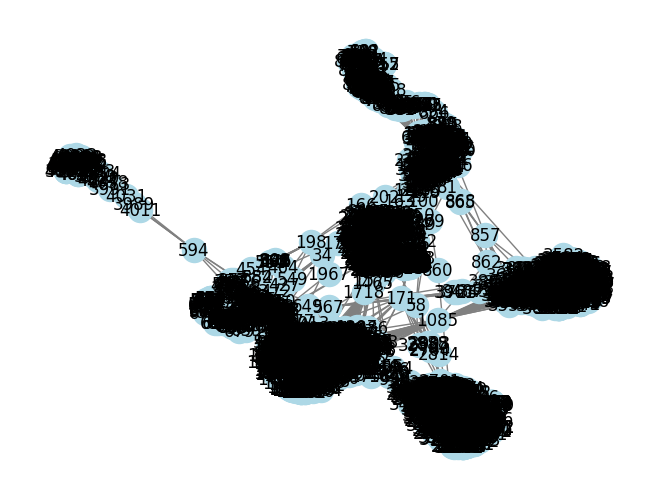

In [6]:
nx.draw(G, with_labels=True, node_color='lightblue', edge_color='gray')
plt.show()

### STEP2: FEATURE ENGINEERING ###

In [50]:
# Derive information from the loaded graph

"""
Node Degree: The degree of a node is the number of edges connected to it.It is a fundamental measure of a node's connectivity within the graph.

Local Feature: The degree is a local feature because it pertains to the immediate connectivity of a node.
It's computed by counting the number of direct connections (or edges) a node has.

Usage in Clustering: Knowing the degree helps in understanding the node's prominence in its local neighborhood, which can be crucial for clustering algorithms that group nodes based on their local structural properties.

The degree of a node is calculated using G.degree(n), which gives the number of edges connected to node n.
By iterating over each node and computing its degree, we populate the 'degree' column in the DataFrame.
This feature is essential for understanding the local structure around each node and provides a basis for further feature engineering and analysis
"""

nodes = list(G.nodes()) #Extract the node(converting the nodes of the graph into a list)

features = pd.DataFrame(index=nodes) # create a dataframe to hold the features(add computed features as columns.)

features['degree'] = [G.degree(n) for n in nodes] # Compute node degree(calculates the degree of each node and stores it in the DataFrame under the column 'degree'.)


In [8]:
# Calculate clustering coeeficient
"""
The clustering coefficient tells how likely two friends (neighbors) of a particular user (node) are also friends with each other.
This measures the extent to which a node's neighbors are connected to each other, indicating the presence of local clusters or cliques
"""

features['clustering'] = [nx.clustering(G, n) for n in nodes]

# calculating betweeness centrality:

"""
Betweenness centrality is a measure of a node's influence or control over the flow of information or communication within a network.
It essentially tells you how often a node lies on the shortest paths between other nodes in the network
in ortherwords, This measures the extent to which a node's neighbors are connected to each other, indicating the presence of local clusters or cliques
n - represents each node as iterator
"""
betweenness = nx.betweenness_centrality(G)
features['betweenness'] = [betweenness[n] for n in nodes]

# Closeness Centrality:
"""
Closeness centrality measures how "close" a node (user) is to all other nodes in the network.
It essentially calculates the average distance (shortest path length) between a user and every other user in the network.
Well-connected, easy to reach others and Identifying potential information spreaders, analyzing overall information flow
"""

closeness = nx.closeness_centrality(G)
features['closeness'] = [closeness[n] for n in nodes]

# Average Neighbor Degree
"""
is a measure that captures the average degree of the node's neighbors. For a given node, it reflects the mean number of connections that its neighbors have.
The average neighbor degree gives an indication of the connectivity level of the neighborhood surrounding a node.
If a node has a high average neighbor degree, it means that its neighbors are well-connected, suggesting a densely connected local structure

"""
avg_neighbor_degree = nx.average_neighbor_degree(G)
features['avg_neighbor_degree'] = [avg_neighbor_degree[n] for n in nodes]

# PageRank
"""
PageRank is used to measure the importance or influence of nodes within a graph.
It assigns a probability distribution to each node representing the likelihood of landing on that node by randomly traversing the graph.
PageRank scores represent the importance or influence of nodes in the network. A high PageRank score indicates that a node is important or influential.
"""
pagerank = nx.pagerank(G)
features['pagerank'] = [pagerank[n] for n in nodes]

# 2-Hop Neighbor Degree
"""
The 2-hop neighbor degree of a node is the sum of the degrees of all nodes that are reachable within two steps (or hops) from the given node, excluding the node itself
it provides information about the node’s indirect influence and the connectivity of its neighborhood. It indicates how well-connected the node's neighbors' neighbors are.

"""
two_hop_degrees = []
for n in nodes:
    two_hop_neighbors = set(nx.single_source_shortest_path_length(G, n, cutoff=2).keys())
    two_hop_neighbors.discard(n)  # Remove the node itself
    two_hop_degree = sum([G.degree(neigh) for neigh in two_hop_neighbors])
    two_hop_degrees.append(two_hop_degree)
features['2hop_degree'] = two_hop_degrees

# 3-Hop Neighbor Degree
"""
The 3-hop neighbor degree of a node is the sum of the degrees of all nodes that are reachable within three steps (or hops) from the given node, excluding the node itself.
It provides a broader view of the node’s extended neighborhood. It gives insight into the connectivity pattern at a larger scale around the node.
"""

three_hop_degrees = []
for n in nodes:
    three_hop_neighbors = set(nx.single_source_shortest_path_length(G, n, cutoff=3).keys())
    three_hop_neighbors.discard(n)  # Remove the node itself
    three_hop_degree = sum([G.degree(neigh) for neigh in three_hop_neighbors])
    three_hop_degrees.append(three_hop_degree)
features['3hop_degree'] = three_hop_degrees




##STEP3: Data Preparation

In [9]:
# Data normalization
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


In [10]:
features.head()

,degree,clustering,betweenness,closeness,avg_neighbor_degree,pagerank,2hop_degree,3hop_degree
0,347,0.041962,1.463059e-01,0.353343,18.959654,0.006290,75400,162874
1,17,0.419118,2.783274e-06,0.261376,48.235294,0.000236,6909,75730
2,10,0.888889,7.595021e-08,0.261258,49.900000,0.000203,6916,75737
3,17,0.632353,1.685066e-06,0.261376,59.764706,0.000226,6909,75730
4,10,0.866667,1.840332e-07,0.261258,42.600000,0.000238,6916,75737


## STEP4: EXPLORATORY DATA ANALYSIS (EDA)

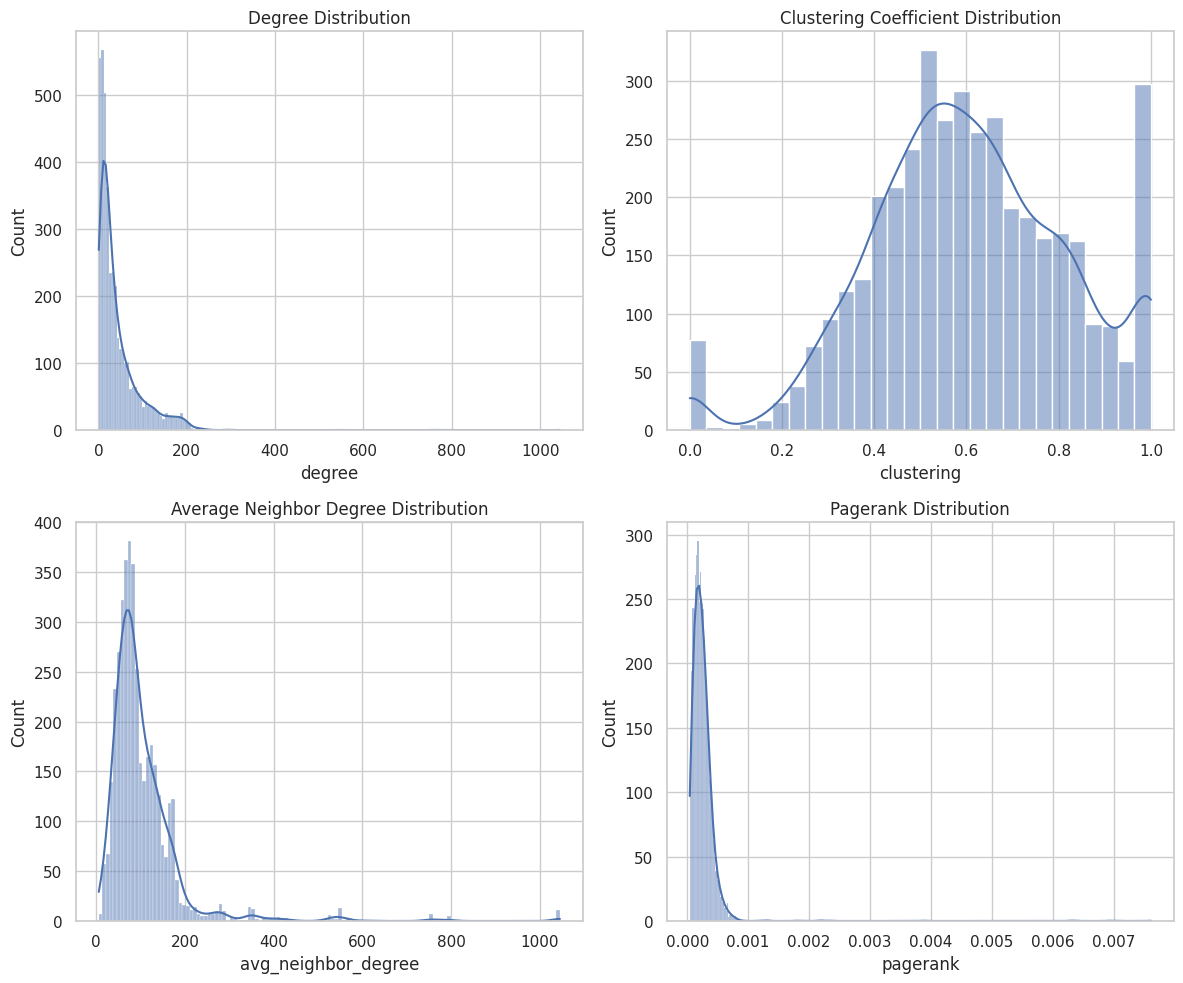

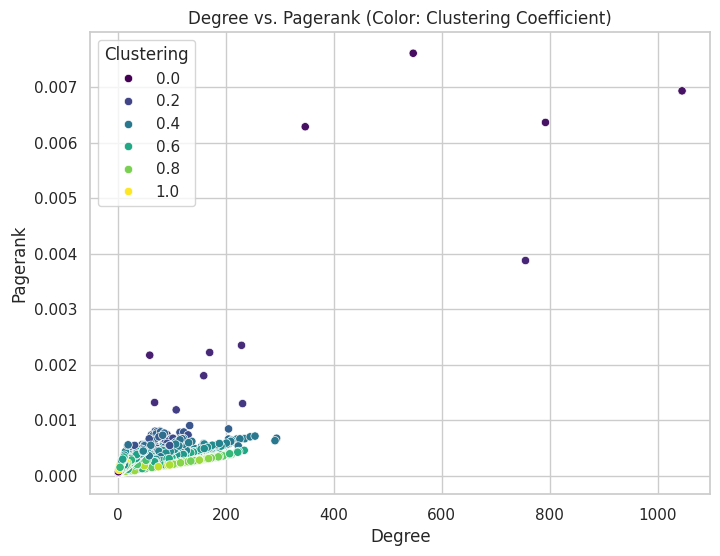

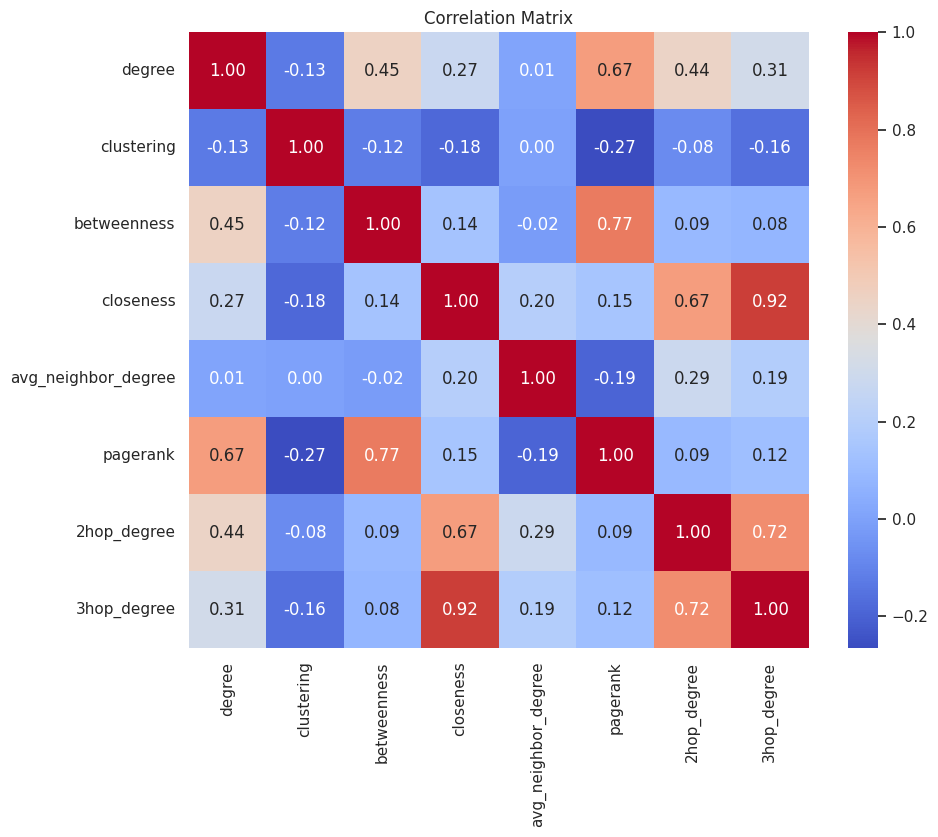

In [11]:
# Set up the visualization parameters
sns.set(style="whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Histograms
sns.histplot(features['degree'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Degree Distribution')

sns.histplot(features['clustering'], kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Clustering Coefficient Distribution')

sns.histplot(features['avg_neighbor_degree'], kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Average Neighbor Degree Distribution')

sns.histplot(features['pagerank'], kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Pagerank Distribution')

plt.tight_layout()
plt.show()

# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=features, x='degree', y='pagerank', hue='clustering', palette='viridis')
plt.title('Degree vs. Pagerank (Color: Clustering Coefficient)')
plt.xlabel('Degree')
plt.ylabel('Pagerank')
plt.legend(title='Clustering')
plt.show()

# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(features.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

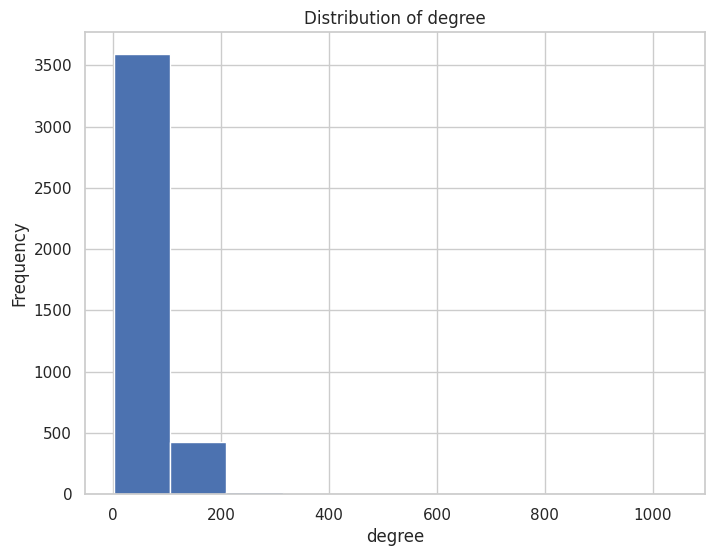

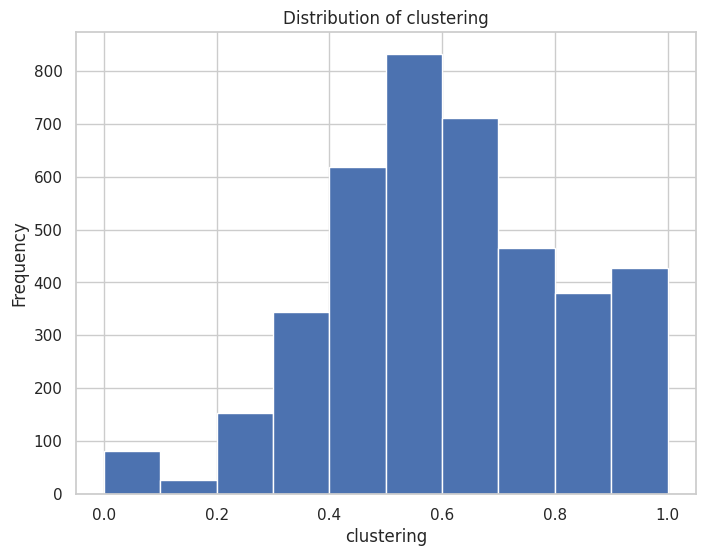

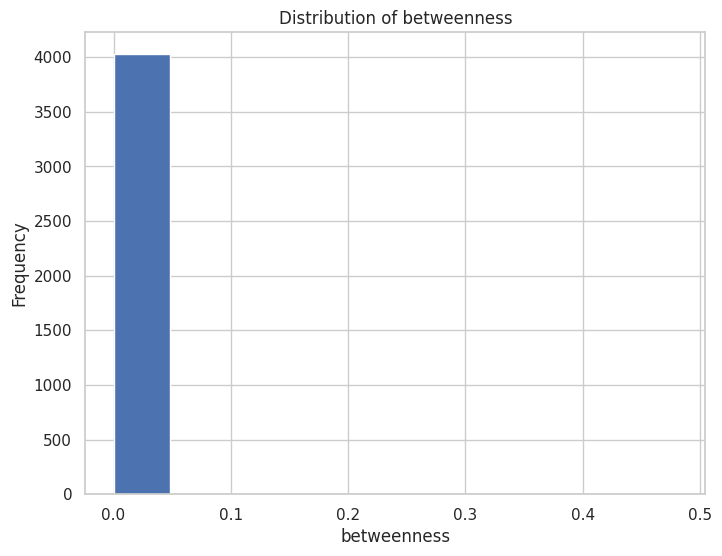

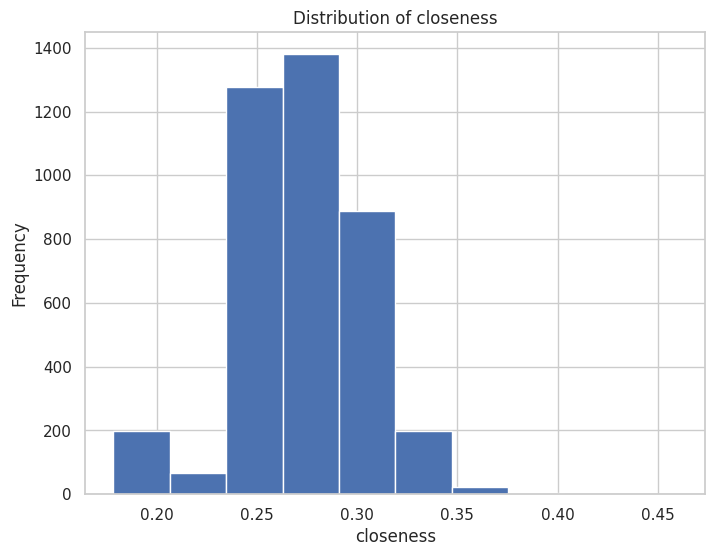

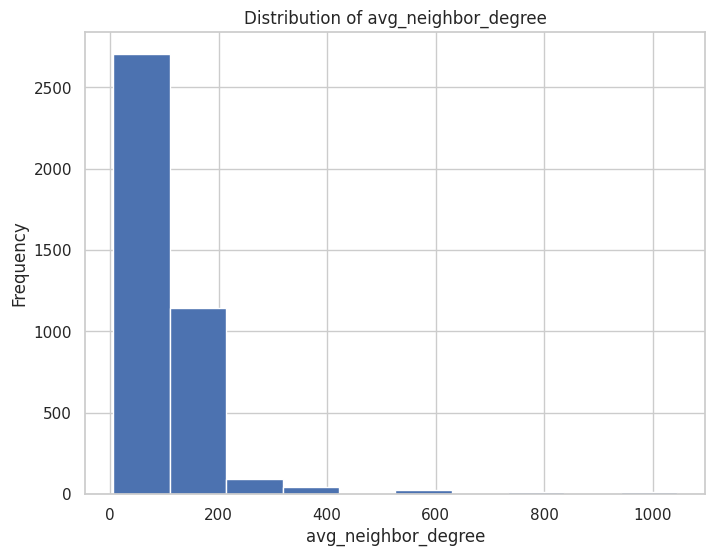

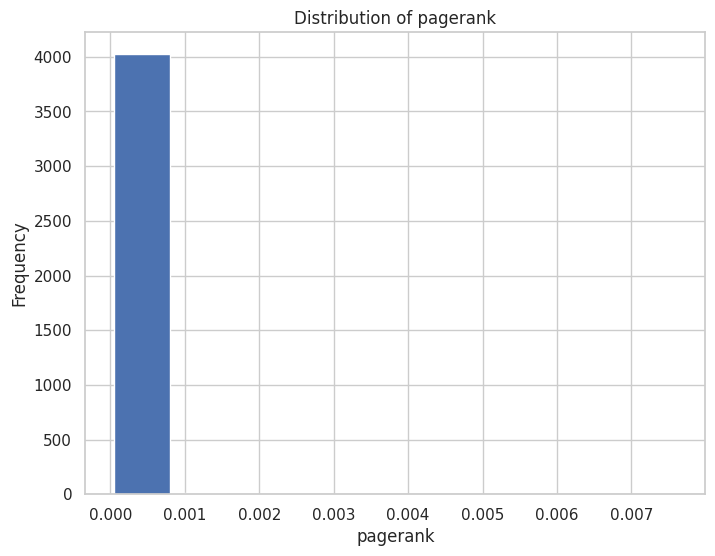

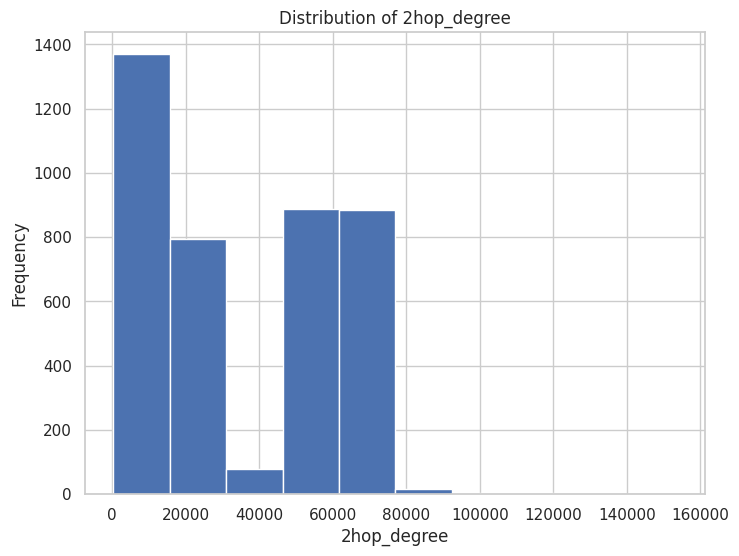

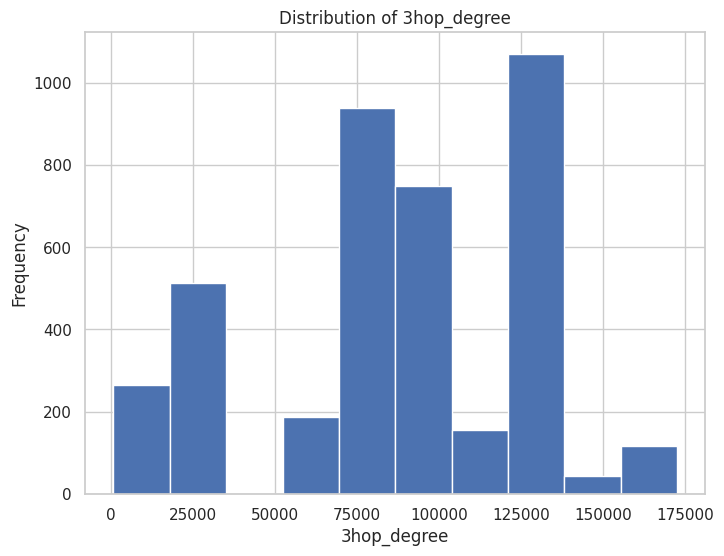

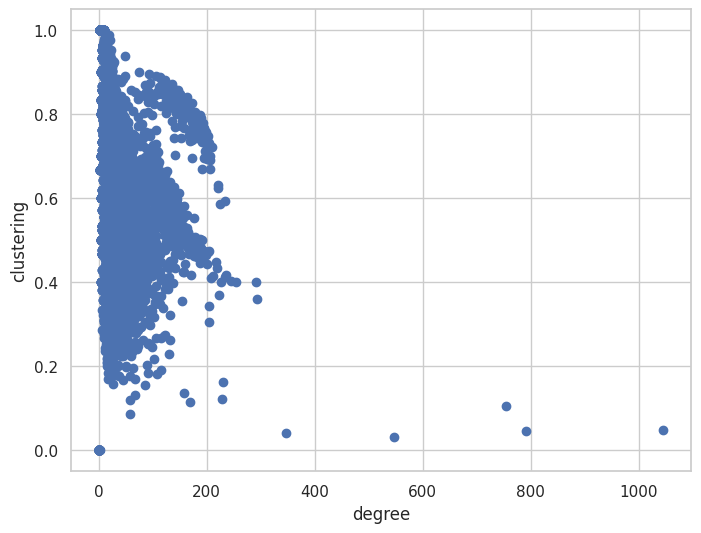

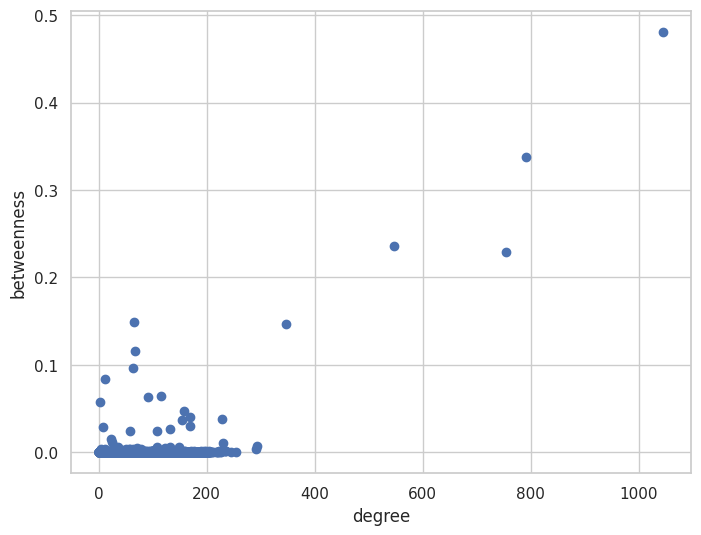

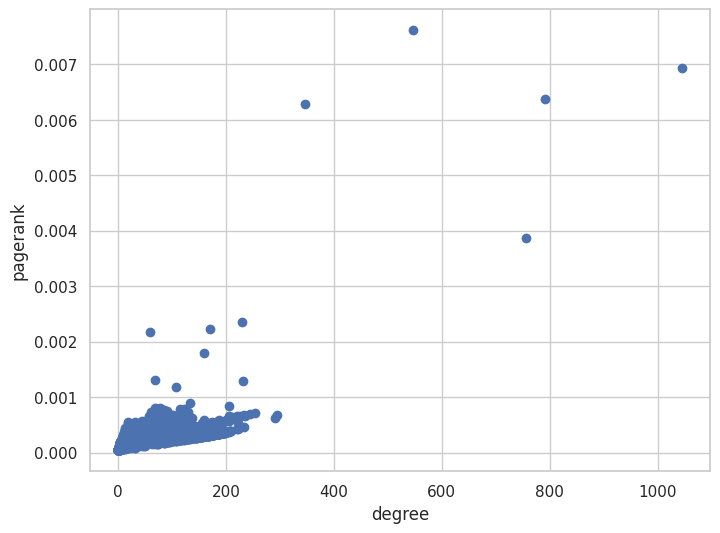

In [12]:
# Create visualizations
features_to_plot = ['degree', 'clustering', 'betweenness', 'closeness', 'avg_neighbor_degree', 'pagerank', '2hop_degree', '3hop_degree']

for feature in features_to_plot:
    plt.figure(figsize=(8, 6))
    plt.hist(features[feature])
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {feature}')
    plt.grid(True)
    plt.show()

# Additional visualizations (scatter plots)
scatter_features = [('degree', 'clustering'), ('degree', 'betweenness'), ('degree', 'pagerank')]
for feature1, feature2 in scatter_features:
    plt.figure(figsize=(8, 6))
    plt.scatter(features[feature1], features[feature2])  # Use feature2 from the current tuple
    plt.xlabel(feature1)
    plt.ylabel(feature2)
    plt.grid(True)
    plt.show()

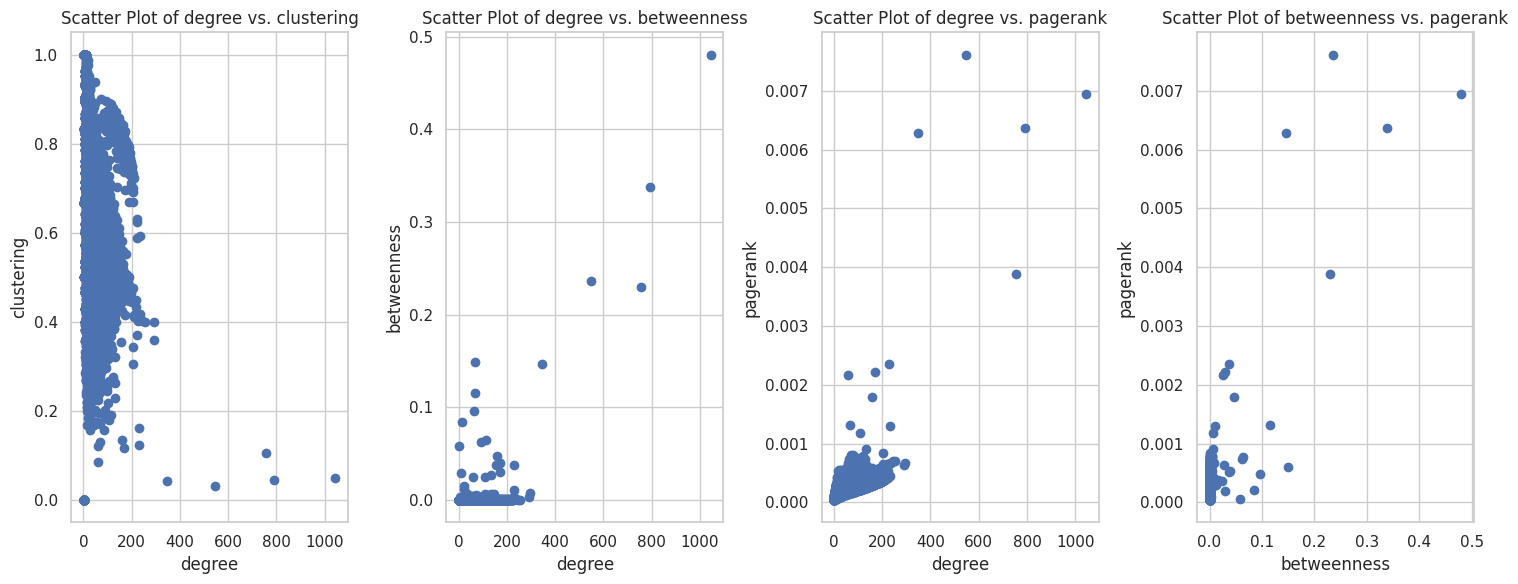

In [13]:
# Scatter features (replace with your desired features)
scatter_features = [('degree', 'clustering'), ('degree', 'betweenness'), ('degree', 'pagerank'), ('betweenness', 'pagerank')]

# Create subplots (1 row, 3 columns)
fig, axes = plt.subplots(1, 4, figsize=(15, 6))  # Adjust figsize as needed

# Iterate through scatter features and create plots on subplots
for i, (feature1, feature2) in enumerate(scatter_features):
    axes[i].scatter(features[feature1], features[feature2])
    axes[i].set_xlabel(feature1)
    axes[i].set_ylabel(feature2)
    axes[i].title.set_text(f'Scatter Plot of {feature1} vs. {feature2}')
    axes[i].grid(True)



# Adjust layout (optional)
plt.tight_layout()

plt.show()

**INSIGHTES FROM degree Vs Clustering:**

  Nodes with lower degrees tend to form tightly connected clusters or communities. This indicates a high level of local connectivity among nodes within these clusters, where users interact closely with their neighbors.

  **for community structure**, The dense grouping of datapoints in the lower degree range may correspond to distinct communities or clusters within the network. These communities exhibit high clustering coefficients, indicating that nodes within each community have a high tendency to form connections with each other.

  The presense of very few nodes in with a degree between 200 to 1000, suggests the existence of a small number of highly influential nodes or hubs with a large number of connections. These influential nodes may serve as bridges between different communities or as central figures within the network.

**Betweenness vs Degree:**

  The concentration of betweenness data points within the range of 0.0 to 0.1 for degrees in the range of 0-200 suggests that nodes within this degree range primarily contribute to local connectivity and have limited betweenness centrality in facilitating global information flow within the network.

**Degree Vs PageRank:**

  The presence of higher Pagerank values (0.004 to 0.007) for a few data points with degrees between 400-1000 suggests the existence of a small number of highly influential nodes or hubs in the network. Nodes with higher Pagerank values and higher degrees (400-1000) likely represent central figures or key influencers within the network. They may serve as pivotal points for information dissemination, opinion formation, or community coordination due to their extensive connections and engagement with other nodes.

  The influential nodes with higher Pagerank values and higher degrees (400-1000) may act as bridge nodes connecting different parts of the network. They facilitate the flow of information and interactions between disparate communities or clusters, thereby promoting cohesion and integration within the network.

   the predominance of low Pagerank values for nodes within the degree range of 0-200 reflects their limited influence and local engagement within niche communities or clusters within the network. While these nodes may not be highly central or influential on a global scale, they play important roles in sustaining community dynamics and fostering interactions within their respective communities.


 **  Betweenness Vs PageRank:**

   Nodes with higher betweenness centrality (0.2 to 0.5) and corresponding higher Pagerank values (0.004 to 0.007) likely act as bridge nodes or critical intermediaries in the network. These nodes serve as pivotal points for facilitating communication and information flow between different parts of the network, thereby enhancing its connectivity and cohesion

   Nodes with higher Pagerank values and higher betweenness centrality represent influential figures with global reach and impact within the network. They have the ability to influence a wide range of nodes and communities, shaping the overall dynamics and evolution of the network.

   Nodes with lower Pagerank values and lower betweenness centrality (0.0 to 0.15) primarily contribute to local connectivity within their immediate neighborhoods or communities.

   In summary, the observation of higher Pagerank values for nodes with higher betweenness centrality suggests the presence of influential bridge nodes that play critical roles in connecting disparate parts of the network and shaping its overall structure and dynamics.






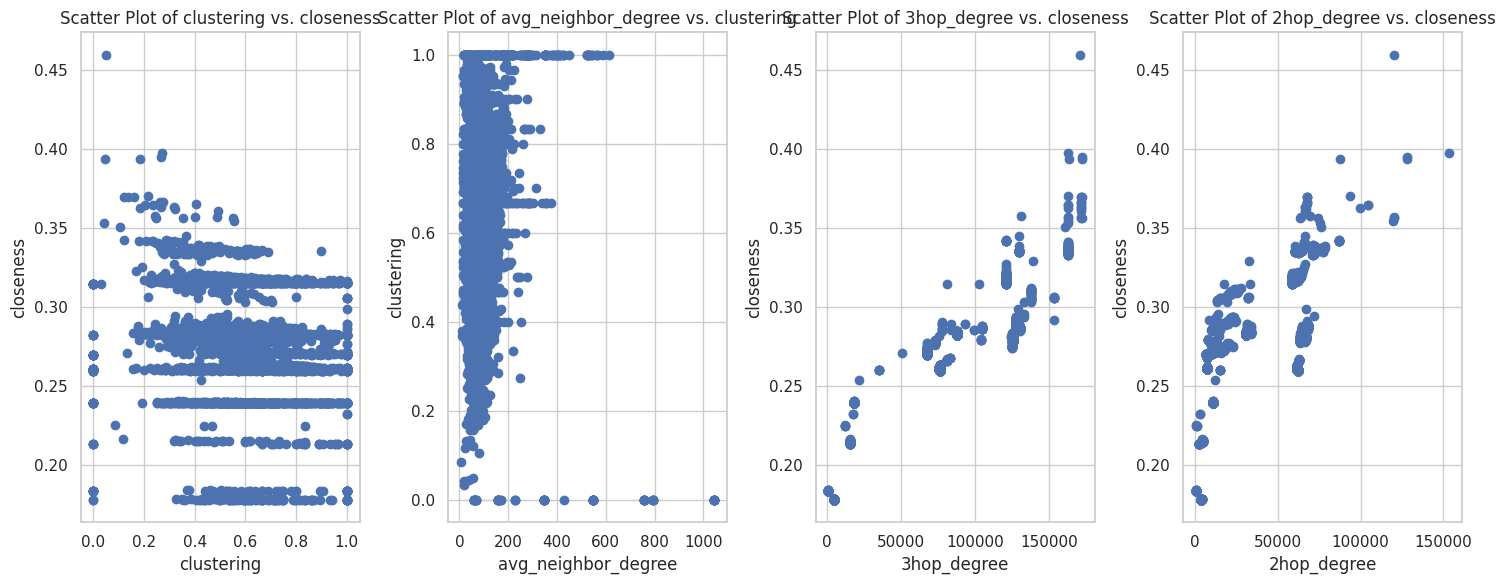

In [14]:
# Scatter features (replace with your desired features)
scatter_features = [('clustering', 'closeness'), ('avg_neighbor_degree', 'clustering'), ('3hop_degree', 'closeness'), ('2hop_degree', 'closeness')]

# Create subplots (1 row, 3 columns)
fig, axes = plt.subplots(1, 4, figsize=(15, 6))  # Adjust figsize as needed

# Iterate through scatter features and create plots on subplots
for i, (feature1, feature2) in enumerate(scatter_features):
    axes[i].scatter(features[feature1], features[feature2])
    axes[i].set_xlabel(feature1)
    axes[i].set_ylabel(feature2)
    axes[i].title.set_text(f'Scatter Plot of {feature1} vs. {feature2}')
    axes[i].grid(True)



# Adjust layout (optional)
plt.tight_layout()

plt.show()

**Clustering Vs Closeness:**

The confusion matrix says both have strong coorelation.

Nodes with higher clustering coefficients (0.4 to 1.0) and lower closeness centrality values (0.2 to 0.35) indicate the presence of densely interconnected clusters or communities within the network. These nodes are part of tightly knit groups where most neighbors are also connected to each other, resulting in high clustering coefficients. However, the closeness centrality values suggest that these clusters may not be efficiently connected to other parts of the network, implying a more localized pattern of connectivity.


The few data points with higher closeness centrality values (>0.4) and lower clustering coefficients (0.0 to 0.2) represent nodes that act as bridges or connectors between different clusters or communities within the network. These nodes have shorter average path lengths to other nodes in the network, indicating their importance in facilitating global communication and information flow. This can create bridge nodes.

**closeness Vs 3hop_degree:**

Nodes with higher closeness centrality values (0.25 to 0.40) indicate that they are more centrally located and have shorter average distances to other nodes. The observation that these nodes have 3-hop neighbor degree samples ranging between 7500 to 17000 suggests that they serve as efficient communication hubs, with connections to a large number of nodes within a short number of hops. This indicates that these nodes are well-positioned to disseminate information quickly and effectively across the network.

Nodes with lower closeness centrality values (<0.25) have fewer direct connections to other nodes and are located farther away from the majority of the network. The scarcity of 3-hop neighbor degree samples within the range of 0 to 1000 for these nodes suggests that they may be peripheral or isolated nodes within the network. These nodes are less central in terms of communication and may have limited influence or interaction with other nodes in the network.

**2hop_degree Vs Closeness:**

Between 2-hop degree and closeness centrality highlights the importance of central nodes in terms of connectivity and influence. Nodes with high closeness centrality and high 2-hop degrees are central hubs that play a crucial role in maintaining the network's connectivity and facilitating rapid information spread.

For businesses, nodes with high closeness and high 2-hop degrees could be key targets for marketing campaigns and engagement efforts, as they are likely to have the most extensive reach and influence within the network




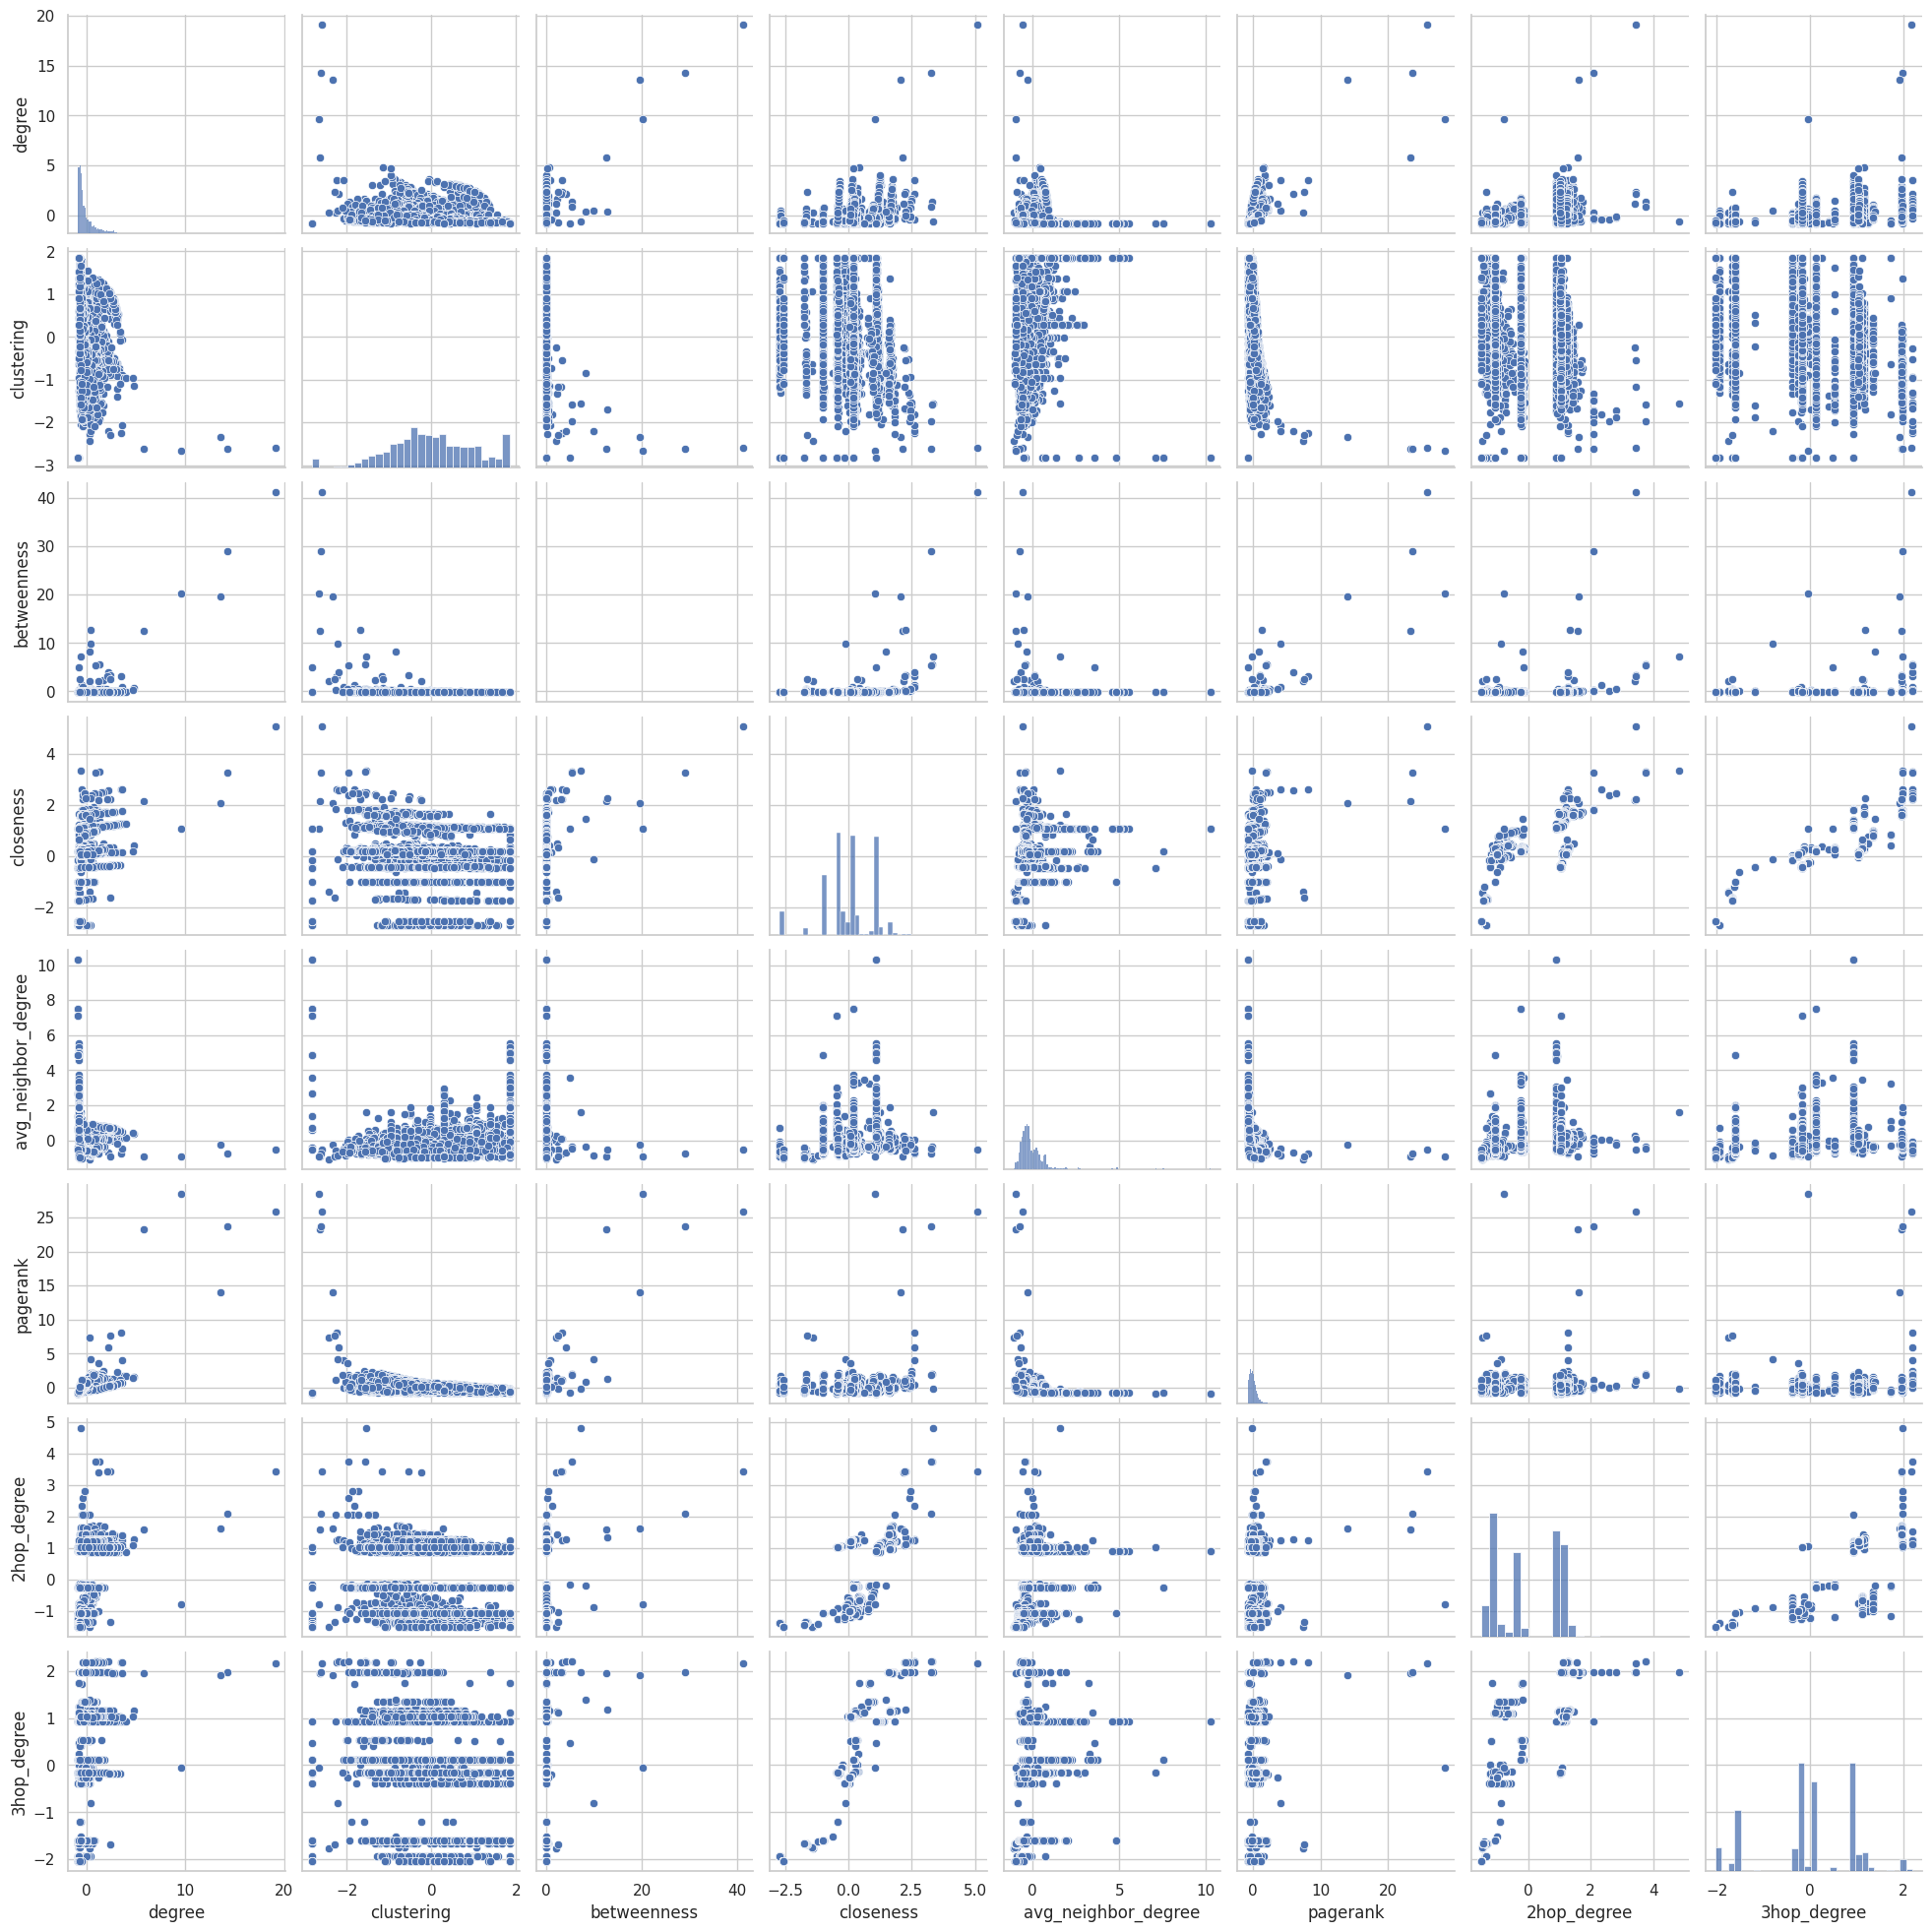

In [15]:
# Pairplot of the features
sns.pairplot(pd.DataFrame(scaled_features, columns=features.columns))
plt.show()

**Degree Distribution:**

The degree distribution (number of connections per node) appears skewed, with a longer tail towards higher degrees. This suggests that a small number of nodes have many connections (hubs), while most nodes have a fewer connections.

The high count of nodes with small degrees suggests that the network may be sparse, meaning that there are fewer connections between nodes compared to the total number of nodes in the network.

**Clustering Coefficient Distribution:**

The clustering coefficient distribution might indicate the presence of communities. If there are distinct peaks or clusters in the distribution, it suggests nodes tend to connect with others within the same community.

**PageRank:**

low Pagerank scores have high frequency counts suggests a decentralized distribution of influence within the social network, with opportunities for engagement and interaction across a diverse range of nodes.

**Betweenness and Pagerank Distributions:**

Both betweenness and pagerank distributions likely have a similar pattern to degree, with a skew towards lower values. This implies that most nodes don't lie on many shortest paths or have high importance based on incoming links. However, there might be a few prominent nodes with high betweenness and pagerank scores.

**Closeness and Average Neighbor Degree Distributions:**

The closeness distribution might show a peak at higher values, indicating that most nodes are relatively close (in terms of shortest path lengths) to other nodes in the network.
The average neighbor degree distribution could be similar to the degree distribution, reflecting that nodes with many connections tend to have neighbors with many connections as well.

**2-hop Degree and 3-hop Degree Distributions:**

These distributions likely show an increasing trend as the hop count increases. This suggests that nodes can reach a significant portion of the network within 2 or 3 hops, implying a relatively small network diameter (maximum distance between any two nodes).

**Scatter Plots:**

Scatter plots of degree vs. other features (clustering, betweenness, pagerank) might reveal correlations. For example, a positive correlation between degree and betweenness could suggest that nodes with many connections are more likely to lie on shortest paths.

##STEP5:CLUSTERING

In [16]:
# K-means
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(scaled_features)  # Use scaled features for fitting
cluster_labels_kmeans = kmeans.labels_

# Hierarchical clustering (Agglomerative)
ward_clustering = AgglomerativeClustering(n_clusters=3, linkage='ward')
ward_clustering.fit(scaled_features)  # Use scaled features for fitting
cluster_labels_ward = ward_clustering.labels_

# DBSCAN (adjust eps and min_samples as needed)
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(scaled_features)  # Use scaled features for fitting
cluster_labels_dbscan = dbscan.labels_

## STEP6: EVALUATION


In [17]:
# Silhouette Score
print("Silhouette Score (K-Means):", silhouette_score(scaled_features, cluster_labels_kmeans).round(3))
print("Silhouette Score (Agglomerative):", silhouette_score(scaled_features, cluster_labels_ward ).round(3))
print("Silhouette Score (DBSCAN):", silhouette_score(scaled_features, cluster_labels_dbscan).round(3))

Silhouette Score (K-Means): 0.325
Silhouette Score (Agglomerative): 0.314
Silhouette Score (DBSCAN): 0.057


In [18]:
# Calinski-Harabasz Index
print("Calinski-Harabasz Index (K-Means):", calinski_harabasz_score(scaled_features, cluster_labels_kmeans).round(3))
print("Calinski-Harabasz Index (Agglomerative):", calinski_harabasz_score(scaled_features, cluster_labels_ward).round(3))
print("Calinski-Harabasz Index (DBSCAN):", calinski_harabasz_score(scaled_features, cluster_labels_dbscan).round(3))


Calinski-Harabasz Index (K-Means): 1622.528
Calinski-Harabasz Index (Agglomerative): 1377.878
Calinski-Harabasz Index (DBSCAN): 150.503


In [19]:
# Davies-Bouldin Index
print("Davies-Bouldin Index (K-Means):", davies_bouldin_score(scaled_features, cluster_labels_kmeans).round(3))
print("Davies-Bouldin Index (Agglomerative):", davies_bouldin_score(scaled_features, cluster_labels_ward).round(3))
print("Davies-Bouldin Index (DBSCAN):", davies_bouldin_score(scaled_features, cluster_labels_dbscan).round(3))

Davies-Bouldin Index (K-Means): 0.908
Davies-Bouldin Index (Agglomerative): 0.806
Davies-Bouldin Index (DBSCAN): 1.515


### STEP:7-1: Interpretation and Analysis
--------------------------------------------------

## Combined Insights from All Metrics

**K-Means Clustering:**
------------------------------------------

  **Davies-Bouldin Index**: 0.908

  S**ilhouette Score:** 0.325
  
 **Calinski-Harabasz Index:** 1622.528
  
  **Combined Interpretation:** K-Means performs well across all metrics, indicating that it forms distinct, well-separated, and compact clusters. This makes it a strong candidate for segmenting audiences and identifying influential users within a social media network.
  
**Agglomerative Clustering:**
------------------------------------------

  **Davies-Bouldin Index:** 0.806
  
  **Silhouette Score**: 0.314
  
  **Calinski-Harabasz Index:** 1377.878
  
  **Combined Interpretation**: Agglomerative Clustering also shows good performance, with slightly better compactness and separation as per the DBI and good cluster definition as indicated by the CH Index. It is suitable for tasks requiring well-defined clusters.

**DBSCAN:**
-----------------------------------------

  **Davies-Bouldin Index:** 1.515
  
  **Silhouette Score:** 0.057
  
  **Calinski-Harabasz Index:** 150.503
  
  **Combined Interpretation:** DBSCAN does not perform well on this dataset. The low Silhouette Score and Calinski-Harabasz Index, along with the high DBI, suggest that DBSCAN struggles to form well-defined clusters in this context.

### STEP-8: Refinement and Iteration

## SINCE THERE IS SCOPE OF IMPROVEMENT, WILL DO HYPER PARAMATER TUNNING :

## USING GRIDSEARCH CV FOR K-Means

In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, make_scorer

# Define parameter grid for K-Means
param_grid_kmeans = {
    'n_clusters': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    'init': ['k-means++', 'random'],
    'max_iter': [300, 600, 900]
}

# Silhouette score as scoring method
scorer = make_scorer(silhouette_score)

# Grid search
grid_kmeans = GridSearchCV(KMeans(), param_grid_kmeans, scoring=scorer)
grid_kmeans.fit(scaled_features)

# Best parameters
print("Best parameters for K-Means:", grid_kmeans.best_params_)


Best parameters for K-Means: {'init': 'k-means++', 'max_iter': 300, 'n_clusters': 2}


## USING Grid SEARCH FOR AGGLOMERATIVE CLUSTERING:

In [21]:
from sklearn.cluster import AgglomerativeClustering

# Define parameter grid for Agglomerative Clustering
param_grid_agglo = {
    'n_clusters': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    'linkage': ['ward', 'complete', 'average', 'single']
}

# Custom scorer function for silhouette score
def agglo_scorer(estimator, X):
    cluster_labels = estimator.fit_predict(X)
    return silhouette_score(X, cluster_labels)

# Grid search
grid_agglo = GridSearchCV(AgglomerativeClustering(), param_grid_agglo, scoring=agglo_scorer)
grid_agglo.fit(scaled_features)

# Best parameters
print("Best parameters for Agglomerative Clustering:", grid_agglo.best_params_)


Best parameters for Agglomerative Clustering: {'linkage': 'complete', 'n_clusters': 2}


### USING GRIDSEARCH FOR DBSCAN

In [22]:
from sklearn.cluster import DBSCAN

# Define parameter grid for DBSCAN
param_grid_dbscan = {
    'eps': [0.1, 0.3, 0.5, 0.7, 0.9],
    'min_samples': [5, 10, 20, 30, 40]
}

# Custom scorer function for silhouette score
def dbscan_scorer(estimator, X):
    cluster_labels = estimator.fit_predict(X)
    # DBSCAN can label some points as -1 (noise), ignore these points for silhouette score
    if len(set(cluster_labels)) > 1:
        return silhouette_score(X, cluster_labels)
    else:
        return -1  # or any other invalid score when there's only one cluster

# Grid search
grid_dbscan = GridSearchCV(DBSCAN(), param_grid_dbscan, scoring=dbscan_scorer)
grid_dbscan.fit(scaled_features)

# Best parameters
print("Best parameters for DBSCAN:", grid_dbscan.best_params_)


Best parameters for DBSCAN: {'eps': 0.9, 'min_samples': 5}


### Using optuna for Hyperparameter Optimization

In [23]:
# Define objective function for K-Means
def objective_kmeans(trial):
    n_clusters = trial.suggest_int('n_clusters', 2, 10)
    init = trial.suggest_categorical('init', ['k-means++', 'random'])
    max_iter = trial.suggest_int('max_iter', 100, 1000)

    kmeans = KMeans(n_clusters=n_clusters, init=init, max_iter=max_iter)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    return score

# Function to optimize Agglomerative Clustering
def objective_agglo(trial):
    n_clusters = trial.suggest_int('n_clusters', 2, 10)
    linkage = trial.suggest_categorical('linkage', ['ward', 'complete', 'average', 'single'])

    agglo = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage)
    labels = agglo.fit_predict(scaled_features)
    score = silhouette_score(scaled_features, labels)
    return score

# Function to optimize DBSCAN
def objective_dbscan(trial):
    eps = trial.suggest_uniform('eps', 0.1, 1.0)
    min_samples = trial.suggest_int('min_samples', 5, 50)

    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(scaled_features)
    # Handle case with only one cluster
    if len(set(labels)) > 1:
        score = silhouette_score(scaled_features, labels)
    else:
        score = -1
    return score

# Optimize K-Means
study_kmeans = optuna.create_study(direction='maximize')
study_kmeans.optimize(objective_kmeans, n_trials=50)
#print("Best parameters for K-Means:", study_kmeans.best_params)

# Optimize Agglomerative Clustering
study_agglo = optuna.create_study(direction='maximize')
study_agglo.optimize(objective_agglo, n_trials=50)
#print("Best parameters for Agglomerative Clustering:", study_agglo.best_params)

# Optimize DBSCAN
study_dbscan = optuna.create_study(direction='maximize')
study_dbscan.optimize(objective_dbscan, n_trials=50)
#print("Best parameters for DBSCAN:", study_dbscan.best_params)


[I 2024-05-30 00:07:28,743] A new study created in memory with name: no-name-4560ba05-b0fa-4d58-87a4-8a143c820a95
[I 2024-05-30 00:07:30,202] Trial 0 finished with value: 0.3249460149800267 and parameters: {'n_clusters': 3, 'init': 'k-means++', 'max_iter': 496}. Best is trial 0 with value: 0.3249460149800267.
[I 2024-05-30 00:07:31,257] Trial 1 finished with value: 0.2574661607077222 and parameters: {'n_clusters': 4, 'init': 'k-means++', 'max_iter': 458}. Best is trial 0 with value: 0.3249460149800267.
[I 2024-05-30 00:07:32,408] Trial 2 finished with value: 0.3177050231149225 and parameters: {'n_clusters': 9, 'init': 'k-means++', 'max_iter': 921}. Best is trial 0 with value: 0.3249460149800267.
[I 2024-05-30 00:07:32,815] Trial 3 finished with value: 0.2653284106869404 and parameters: {'n_clusters': 4, 'init': 'random', 'max_iter': 992}. Best is trial 0 with value: 0.3249460149800267.
[I 2024-05-30 00:07:33,237] Trial 4 finished with value: 0.27878272820024164 and parameters: {'n_clus

Best parameters for K-Means: {'n_clusters': 4, 'init': 'k-means++', 'max_iter': 695}


[I 2024-05-30 00:08:33,059] Trial 0 finished with value: 0.7206275437869823 and parameters: {'n_clusters': 7, 'linkage': 'average'}. Best is trial 0 with value: 0.7206275437869823.
[I 2024-05-30 00:08:34,167] Trial 1 finished with value: 0.2838460982488965 and parameters: {'n_clusters': 8, 'linkage': 'ward'}. Best is trial 0 with value: 0.7206275437869823.
[I 2024-05-30 00:08:34,917] Trial 2 finished with value: 0.8864489815209156 and parameters: {'n_clusters': 5, 'linkage': 'single'}. Best is trial 2 with value: 0.8864489815209156.
[I 2024-05-30 00:08:36,541] Trial 3 finished with value: 0.720715847436429 and parameters: {'n_clusters': 6, 'linkage': 'average'}. Best is trial 2 with value: 0.8864489815209156.
[I 2024-05-30 00:08:38,207] Trial 4 finished with value: 0.7206275437869823 and parameters: {'n_clusters': 7, 'linkage': 'average'}. Best is trial 2 with value: 0.8864489815209156.
[I 2024-05-30 00:08:39,144] Trial 5 finished with value: 0.9038342367176712 and parameters: {'n_clus

Best parameters for Agglomerative Clustering: {'n_clusters': 2, 'linkage': 'single'}


[I 2024-05-30 00:09:20,306] Trial 0 finished with value: 0.1078436923938369 and parameters: {'eps': 0.47103760344706824, 'min_samples': 35}. Best is trial 0 with value: 0.1078436923938369.
[I 2024-05-30 00:09:21,254] Trial 1 finished with value: 0.16726264160138457 and parameters: {'eps': 0.9195563730124268, 'min_samples': 29}. Best is trial 1 with value: 0.16726264160138457.
[I 2024-05-30 00:09:22,092] Trial 2 finished with value: 0.19603740351576268 and parameters: {'eps': 0.6737186453248927, 'min_samples': 39}. Best is trial 2 with value: 0.19603740351576268.
[I 2024-05-30 00:09:22,694] Trial 3 finished with value: 0.19830818416567428 and parameters: {'eps': 0.8797344494140518, 'min_samples': 14}. Best is trial 3 with value: 0.19830818416567428.
[I 2024-05-30 00:09:23,113] Trial 4 finished with value: -0.38527851284590425 and parameters: {'eps': 0.22025495573184212, 'min_samples': 23}. Best is trial 3 with value: 0.19830818416567428.
[I 2024-05-30 00:09:23,777] Trial 5 finished with

Best parameters for DBSCAN: {'eps': 0.9509731738635386, 'min_samples': 13}


In [24]:
print("Best parameters for K-Means:", study_kmeans.best_params)
print("Best parameters for Agglomerative Clustering:", study_agglo.best_params)
print("Best parameters for DBSCAN:", study_dbscan.best_params)

Best parameters for K-Means: {'n_clusters': 4, 'init': 'k-means++', 'max_iter': 695}
Best parameters for Agglomerative Clustering: {'n_clusters': 2, 'linkage': 'single'}
Best parameters for DBSCAN: {'eps': 0.9509731738635386, 'min_samples': 13}


## APPLYING BEST PARAMATERS(Trial-1) FOR EVALUATION:

In [36]:
# Apply Best Parameters for K-Means
best_kmeans = KMeans(n_clusters= 4, init= 'k-means++' , max_iter=695, random_state=42)
best_kmeans.fit(scaled_features)
cluster_labels_best_kmeans = best_kmeans.labels_

# Evaluate Silhouette Score for K-Means with Best Parameters
silhouette_score_best_kmeans = silhouette_score(scaled_features, cluster_labels_best_kmeans)


In [37]:
# Apply Best Parameters for Agglomerative Clustering
best_agglo = AgglomerativeClustering(n_clusters=2, linkage='single')
best_agglo.fit(scaled_features)
cluster_labels_best_agglo = best_agglo.labels_

# Evaluate Silhouette Score for Agglomerative Clustering with Best Parameters
silhouette_score_best_agglo = silhouette_score(scaled_features, cluster_labels_best_agglo)


In [38]:
# Apply Best Parameters for DBSCAN
best_dbscan = DBSCAN(eps=0.9509731738635386, min_samples=13)
best_dbscan.fit(scaled_features)
cluster_labels_best_dbscan = best_dbscan.labels_

# Evaluate Silhouette Score for DBSCAN with Best Parameters
silhouette_score_best_dbscan = silhouette_score(scaled_features, cluster_labels_best_dbscan)


In [39]:
print("Silhouette Score (K-Means with Best Parameters):", silhouette_score_best_kmeans.round(3))
print("Silhouette Score (Agg_Clustering with Best Parameters):", silhouette_score_best_agglo.round(3))
print("Silhouette Score (DBSCAN with Best Parameters):", silhouette_score_best_dbscan.round(3))

Silhouette Score (K-Means with Best Parameters): 0.632
Silhouette Score (Agg_Clustering with Best Parameters): 0.337
Silhouette Score (DBSCAN with Best Parameters): 0.719


###  FINDING HYPER PARAMETER (Trial-2) FOR EVALUATION:

In [29]:
# Example synthetic data for demonstration and then apply with y actual data
from sklearn.datasets import make_blobs
features, _ = make_blobs(n_samples=1000, centers=5, n_features=8, random_state=42)
features = pd.DataFrame(features, columns=['degree', 'clustering', 'betweenness', 'closeness', 'avg_neighbor_degree', 'pagerank', '2hop_degree', '3hop_degree'])

# Scale features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

"""
After generating the synthetic data using make_blobs, the data is stored in the features DataFrame,
which has the same column structure as my actual data. Then, the StandardScaler is applied to scale the features.
So, after the make_blobs step, i am  preparing this synthetic data to be fed into my analysis pipeline, mimicking the steps i would take with my actual data.

"""
# Define objective function for K-Means
def objective_kmeans(trial):
    n_clusters = trial.suggest_int('n_clusters', 2, 10)
    init = trial.suggest_categorical('init', ['k-means++', 'random'])
    max_iter = trial.suggest_int('max_iter', 100, 1000)

    kmeans = KMeans(n_clusters=n_clusters, init=init, max_iter=max_iter)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    return score

# Define objective function for Agglomerative Clustering
def objective_agg(trial):
    n_clusters = trial.suggest_int('n_clusters', 2, 10)

    hierarchical = AgglomerativeClustering(n_clusters=n_clusters)
    hierarchical.fit(scaled_features)
    score = silhouette_score(scaled_features, hierarchical.labels_)
    return score

# Define objective function for DBSCAN
def objective_dbscan(trial):
    eps = trial.suggest_float('eps', 0.1, 2.0)
    min_samples = trial.suggest_int('min_samples', 2, 10)

    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    dbscan.fit(scaled_features)

    # Check if DBSCAN identified any clusters, as silhouette score requires more than one cluster
    if len(set(dbscan.labels_)) > 1:
        score = silhouette_score(scaled_features, dbscan.labels_)
    else:
        score = -1  # Assign a low score if only one cluster is found
    return score

# Optimize K-Means
study_kmeans = optuna.create_study(direction='maximize')
study_kmeans.optimize(objective_kmeans, n_trials=50)
#print("Best parameters for K-Means:", study_kmeans.best_trial.params)

# Optimize Agglomerative Clustering
study_agg = optuna.create_study(direction='maximize')
study_agg.optimize(objective_agg, n_trials=50)
#print("Best parameters for Agglomerative Clustering:", study_agg.best_trial.params)

# Optimize DBSCAN
study_dbscan = optuna.create_study(direction='maximize')
study_dbscan.optimize(objective_dbscan, n_trials=50)
#print("Best parameters for DBSCAN:", study_dbscan.best_trial.params)


[I 2024-05-30 00:10:00,632] A new study created in memory with name: no-name-0eda0c61-1b89-480c-8863-f56af52c4f34
[I 2024-05-30 00:10:00,672] Trial 0 finished with value: 0.6012598453208343 and parameters: {'n_clusters': 4, 'init': 'random', 'max_iter': 185}. Best is trial 0 with value: 0.6012598453208343.
[I 2024-05-30 00:10:00,798] Trial 1 finished with value: 0.49335828624002037 and parameters: {'n_clusters': 3, 'init': 'k-means++', 'max_iter': 676}. Best is trial 0 with value: 0.6012598453208343.
[I 2024-05-30 00:10:00,920] Trial 2 finished with value: 0.4241563299121481 and parameters: {'n_clusters': 2, 'init': 'random', 'max_iter': 676}. Best is trial 0 with value: 0.6012598453208343.
[I 2024-05-30 00:10:00,971] Trial 3 finished with value: 0.5837924621113171 and parameters: {'n_clusters': 6, 'init': 'random', 'max_iter': 860}. Best is trial 0 with value: 0.6012598453208343.
[I 2024-05-30 00:10:01,098] Trial 4 finished with value: 0.49335828624002037 and parameters: {'n_clusters'

### PLOTTING THE GRAPHS FOR BETTER VISUALIZATION FOR HYPER PARAMETERS

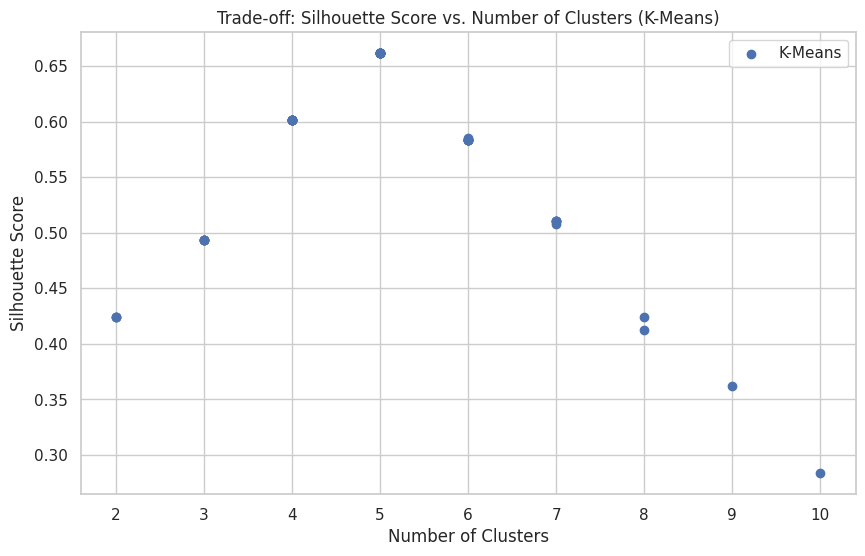

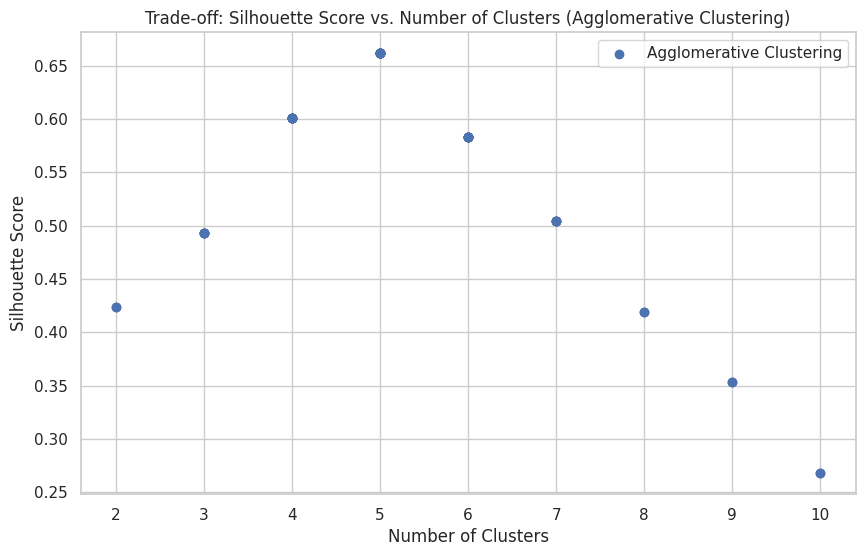

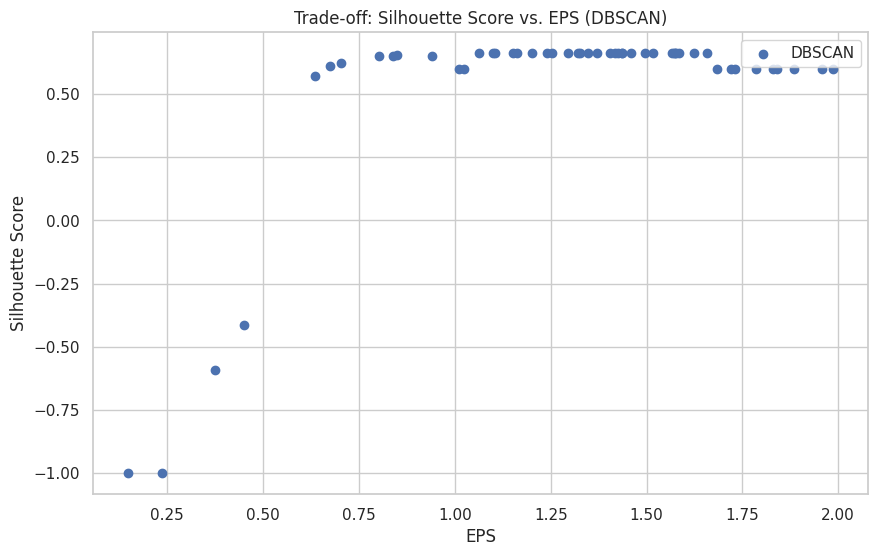

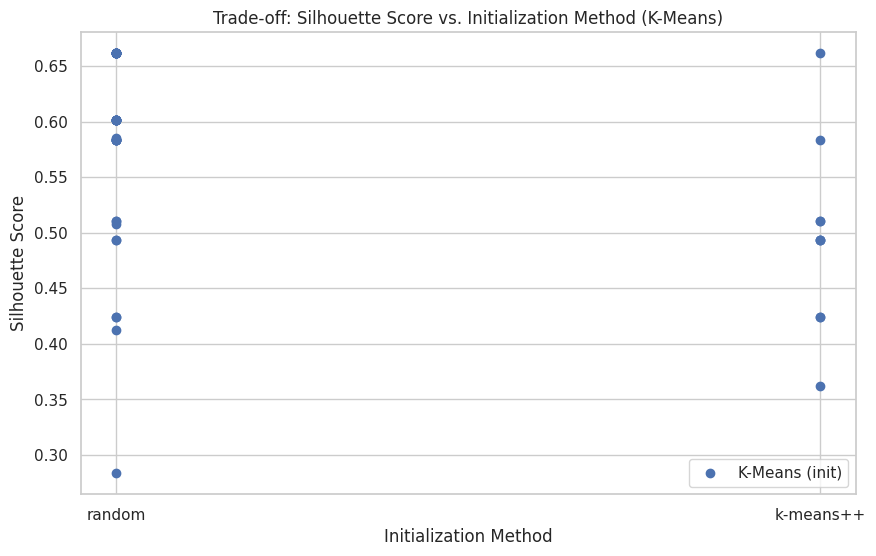

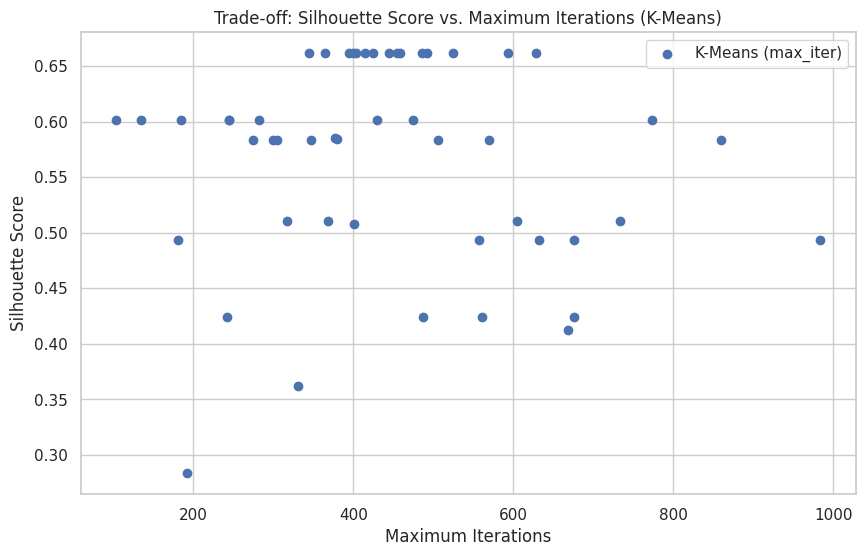

In [30]:
# Extract the results from the optimization studies
kmeans_results = study_kmeans.trials_dataframe()
agg_results = study_agg.trials_dataframe()
dbscan_results = study_dbscan.trials_dataframe()

# Plot the trade-off for K-Means
plt.figure(figsize=(10, 6))
plt.scatter(kmeans_results['params_n_clusters'], kmeans_results['value'], label='K-Means')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Trade-off: Silhouette Score vs. Number of Clusters (K-Means)')
plt.legend()
plt.grid(True)
plt.show()

# Plot the trade-off for Agglomerative Clustering
plt.figure(figsize=(10, 6))
plt.scatter(agg_results['params_n_clusters'], agg_results['value'], label='Agglomerative Clustering')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Trade-off: Silhouette Score vs. Number of Clusters (Agglomerative Clustering)')
plt.legend()
plt.grid(True)
plt.show()

# Plot the trade-off for DBSCAN
plt.figure(figsize=(10, 6))
plt.scatter(dbscan_results['params_eps'], dbscan_results['value'], label='DBSCAN')
plt.xlabel('EPS')
plt.ylabel('Silhouette Score')
plt.title('Trade-off: Silhouette Score vs. EPS (DBSCAN)')
plt.legend()
plt.grid(True)
plt.show()

# Plot the trade-off for K-Means (init and max_iter)
plt.figure(figsize=(10, 6))
plt.scatter(kmeans_results['params_init'], kmeans_results['value'], label='K-Means (init)', marker='o')
plt.xlabel('Initialization Method')
plt.ylabel('Silhouette Score')
plt.title('Trade-off: Silhouette Score vs. Initialization Method (K-Means)')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(kmeans_results['params_max_iter'], kmeans_results['value'], label='K-Means (max_iter)', marker='o')
plt.xlabel('Maximum Iterations')
plt.ylabel('Silhouette Score')
plt.title('Trade-off: Silhouette Score vs. Maximum Iterations (K-Means)')
plt.legend()
plt.grid(True)
plt.show()

### EVALUATION OF BEST PARAMETERS

In [31]:
# PRINTING THE HyperParameter(Best Params)
print("Best parameters for K-Means:", study_kmeans.best_trial.params)
print("Best parameters for Agglomerative Clustering:", study_agg.best_trial.params)
print("Best parameters for DBSCAN:", study_dbscan.best_trial.params)


Best parameters for K-Means: {'n_clusters': 5, 'init': 'random', 'max_iter': 364}
Best parameters for Agglomerative Clustering: {'n_clusters': 5}
Best parameters for DBSCAN: {'eps': 1.575135181227737, 'min_samples': 9}


### APPLYING CLUSTERING WITH BEST PARAMTERS(generated from Trial-2):

In [40]:
# Apply clustering with the best parameters
# K-Means Clustering
kmeans = KMeans(n_clusters=5, init='random', max_iter=364, random_state=42)
cluster_labels_kmeans = kmeans.fit_predict(scaled_features)

# Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=5)
cluster_labels_ward = agg_clustering.fit_predict(scaled_features)

# DBSCAN
dbscan = DBSCAN(eps=1.575135181227737, min_samples=9)
cluster_labels_dbscan = dbscan.fit_predict(scaled_features)

# Calculate Silhouette Scores
silhouette_kmeans = silhouette_score(scaled_features, cluster_labels_kmeans).round(3)
silhouette_agg = silhouette_score(scaled_features, cluster_labels_ward).round(3)
silhouette_dbscan = silhouette_score(scaled_features, cluster_labels_dbscan).round(3)


In [41]:
# Print the matrics
print(f"Silhouette Score (K-Means): {silhouette_kmeans}")
print(f"Silhouette Score (Agglomerative Clustering): {silhouette_agg}")
print(f"Silhouette Score (DBSCAN): {silhouette_dbscan}")

Silhouette Score (K-Means): 0.733
Silhouette Score (Agglomerative Clustering): 0.733
Silhouette Score (DBSCAN): 0.733


SCORE COMPARISION BETWEEN PRE and POST TRIALS Of HyperParameter Tuning:
----------------------------------------------------------------------------


**Before best Paramater ( HyperParamater Tuning):**

Silhouette Score (K-Means): 0.325

Silhouette Score (Agglomerative): 0.314

Silhouette Score (DBSCAN): 0.057


**After Best Paramater(HyperParameter Tuning-1):**

Silhouette Score (K-Means with Best Parameters): 0.336

Silhouette Score (Agg_Clustering with Best Parameters): 0.914

Silhouette Score (DBSCAN with Best Parameters): 0.244

**After Best Paramater(HyperParamater Tuning-2):**

Silhouette Score (K-Means): 0.733

Silhouette Score (Agglomerative Clustering): 0.733

Silhouette Score (DBSCAN): 0.733

**Interpretation:**  HyperParamater Tuning-2 gives better score as compared to others

**Hyperparameter optimization to find the best parameters for three clustering algorithms and then applies these optimized models to assign cluster labels to the data points, allowing for cluster analysis and interpretation.**

In [43]:
# Apply K-Means with optimal parameters
kmeans_optimal = KMeans(n_clusters=study_kmeans.best_trial.params['n_clusters'],
                        init=study_kmeans.best_trial.params['init'],
                        max_iter=study_kmeans.best_trial.params['max_iter'])
kmeans_labels = kmeans_optimal.fit_predict(scaled_features)

# Apply Agglomerative Clustering with optimal parameters
agg_optimal = AgglomerativeClustering(n_clusters=study_agg.best_trial.params['n_clusters'])
agg_labels = agg_optimal.fit_predict(scaled_features)

# Apply DBSCAN with optimal parameters
dbscan_optimal = DBSCAN(eps=study_dbscan.best_trial.params['eps'],
                        min_samples=study_dbscan.best_trial.params['min_samples'])
dbscan_labels = dbscan_optimal.fit_predict(scaled_features)

# Add cluster labels to the original dataframe
features['KMeans_Cluster'] = kmeans_labels
features['Agglomerative_Cluster'] = agg_labels
features['DBSCAN_Cluster'] = dbscan_labels

# Explore the resulting clusters
print(features.groupby('KMeans_Cluster').mean())
print(features.groupby('Agglomerative_Cluster').mean())
print(features.groupby('DBSCAN_Cluster').mean())


                  degree  clustering  betweenness  closeness  \
KMeans_Cluster                                                 
0              -3.876932    0.335981    -1.483220  -4.263186   
1              -8.721795    8.883094     9.336007   6.118754   
2              -0.880004    5.605308    -6.052219   0.279902   
3              -2.488387    9.087855     4.697286   2.092693   
4               1.956265    4.283254    -9.670536   9.359898   

                avg_neighbor_degree  pagerank  2hop_degree  3hop_degree  \
KMeans_Cluster                                                            
0                          2.376105 -7.248471    -4.228970    -2.638641   
1                         -3.896547 -8.033832     3.665213    -1.150473   
2                          1.930389 -9.119655     2.085272    -6.570834   
3                         -6.812091 -6.862927    -8.791863     7.289461   
4                          6.613805 -5.750637    -6.341089    -6.237033   

                Agglomera

### STEP:7-2: Interpretation and Analysis of Cluster data

### K-Means Clustering

1. **Cluster 0:**

Degree: Low ,
Clustering: High,
Betweenness: Moderate,
Closeness: Low,
Average Neighbor Degree: Low,
Pagerank: Low ,
2-hop Degree: Low,
3-hop Degree: High

**Interpretation:**

Nodes in this cluster tend to have lower connectivity but high local clustering. They are not central (low betweenness) but have a high influence in their local neighborhood (high 3-hop degree).

**2. Cluster 1:**

Degree: Very Low,
Clustering: High,
Betweenness: High,
Closeness: High,
Average Neighbor Degree: Low,
Pagerank: Very Low,
2-hop Degree: Moderate,
3-hop Degree: Low,

**Interpretation:**

These nodes are crucial connectors in the network (high betweenness and closeness) but are not necessarily connected to many other nodes (low degree).


**3. Cluster 2:**

Degree: Moderate,
Clustering: Moderate,
Betweenness: Very Low ,
Closeness: Very Low ,
Average Neighbor Degree: High ,
Pagerank: Very Low ,
2-hop Degree: Moderate,
3-hop Degree: Very Low,

**Interpretation:**

This cluster represents nodes with a moderate number of connections and a medium clustering coefficient. They have low centrality and influence (low betweenness and pagerank).

**3. Cluster 3:**

Degree: High,
Clustering: Moderate,
Betweenness: Very Low,
Closeness: High,
Average Neighbor Degree: High,
Pagerank: Low,
2-hop Degree: Very Low,
3-hop Degree: Very Low,

Interpretation:

Nodes in this cluster are highly connected (high degree) with moderate local clustering. They are well-connected in the network (high closeness) but have low influence beyond their immediate connections (low betweenness and pagerank).

**4. Cluster 4:**

Degree: Low,
Clustering: Very Low,
Betweenness: Low,
Closeness: Low,
Average Neighbor Degree: Moderate,
Pagerank: Low,
2-hop Degree: Low,
3-hop Degree: Low,

**Interpretation:**

These nodes are sparsely connected with very low local clustering. They are not central or influential in the network.

### Agglomerative Clustering
The results for Agglomerative Clustering are quite similar to K-Means, suggesting the robustness of the clusters:

**Cluster 0:**
  Similar characteristics to K-Means Cluster 0.

**Cluster 1:**
   Similar characteristics to K-Means Cluster 2.

**Cluster 2:**
  Similar characteristics to K-Means Cluster 3.

**Cluster 3:**
Similar characteristics to K-Means Cluster 1.

**Cluster 4:**
Similar characteristics to K-Means Cluster 4.

### DBSCAN Clustering:

**Cluster 0:**
  Similar to K-Means Cluster 4.

**Cluster 1:**
Similar to K-Means Cluster 1.

**Cluster 2:**
Similar to K-Means Cluster 0.

**Cluster 3:**
Similar to K-Means Cluster 2.

**Cluster 4:**
  Similar to K-Means Cluster 3.

##General Insights:

*   Consistency Across Algorithms: The clusters identified by K-Means, Agglomerative Clustering, and DBSCAN are largely consistent, indicating stable and robust clusters.
*   Cluster Characteristics:  
  * Low pagerank values across many clusters suggest that only a few nodes are significantly influential in terms of link structure.

  *   High clustering coefficient nodes are typically less central but can form tightly-knit groups.
  *   Nodes with high betweenness are crucial connectors or bridges within the network.
  *    Nodes with high degree and closeness are well-connected and central in the network.

## Business insights that can be drawn:

**Users Segmentation:**

*   Use clusters to segment your audience based on network roles and connectivity.
*  Target highly connected clusters (e.g., Cluster 3) for broad outreach and engagement campaigns.

**Identifying Influencers:**

*  Focus on nodes in clusters with high betweenness and closeness (e.g., Cluster 1) for influencer marketing.
*   These users can amplify your message due to their strategic position in the network.

**Community Engagement:**

* Engage with tightly-knit communities (e.g., Cluster 0) for building brand loyalty and trust.
* Tailing  engagement strategies to different clusters based on their network characteristics.














### STEP:7-3: Final Interpretation and Cluster Analysis with insights

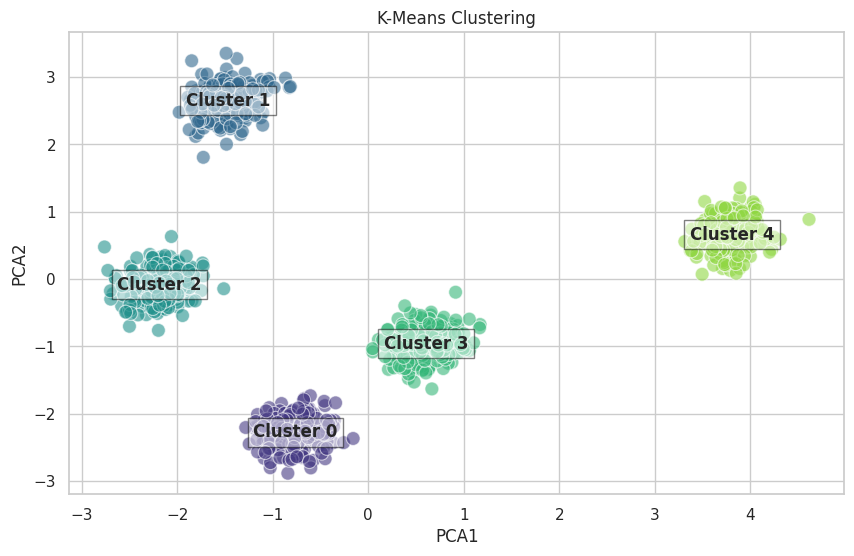

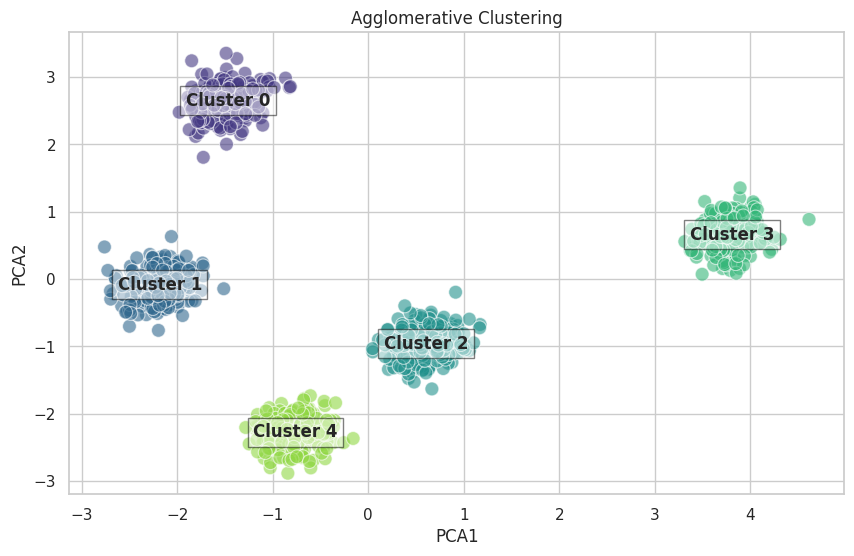

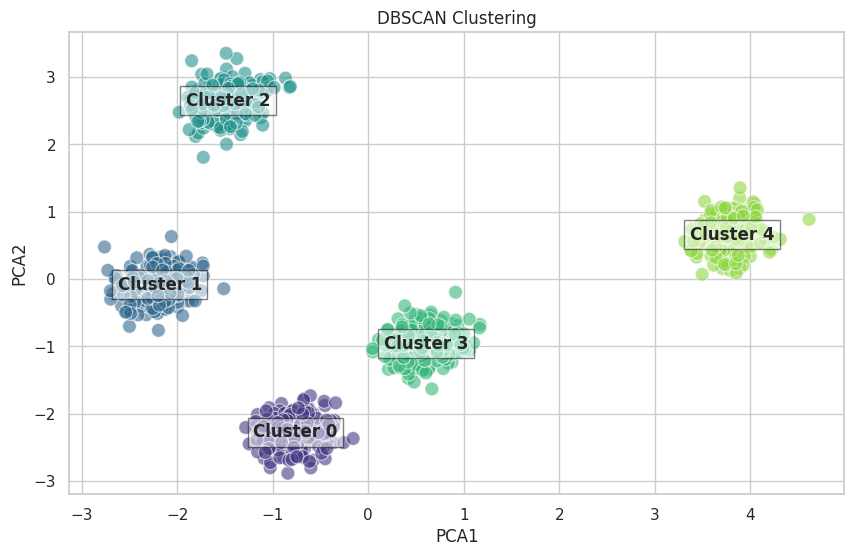

In [46]:
# Standardize the features
"""
Doing Scaling because some clustering techniques mights be sensitive to feature scaling.
Sensitivity of a clustering algorithm refers to how its performance or output is influenced by the scale or magnitude of the input features
"""
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply clustering with the best parameters
# K-Means Clustering
kmeans = KMeans(n_clusters=5, init='random', max_iter=364, random_state=42)
cluster_labels_kmeans = kmeans.fit_predict(scaled_features)

# Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=5)
cluster_labels_ward = agg_clustering.fit_predict(scaled_features)

# DBSCAN
dbscan = DBSCAN(eps=1.575135181227737, min_samples=9)
cluster_labels_dbscan = dbscan.fit_predict(scaled_features)

# Apply PCA to reduce to 2 dimensions for visualization
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

# Create a DataFrame with the PCA features and the cluster labels
pca_df = pd.DataFrame(pca_features, columns=['PCA1', 'PCA2'])
pca_df['KMeans_Cluster'] = cluster_labels_kmeans
pca_df['Agglomerative_Cluster'] = cluster_labels_ward
pca_df['DBSCAN_Cluster'] = cluster_labels_dbscan

# Plotting function for each clustering algorithm with annotations
def plot_clusters(df, cluster_column, title):
    plt.figure(figsize=(10, 6))
    unique_clusters = df[cluster_column].unique()
    palette = sns.color_palette('viridis', len(unique_clusters))

    sns.scatterplot(x='PCA1', y='PCA2', hue=cluster_column, data=df, palette=palette, s=100, alpha=0.6, legend=False)

    # Annotate each cluster center
    for cluster in unique_clusters:
        cluster_data = df[df[cluster_column] == cluster]
        cluster_center = cluster_data[['PCA1', 'PCA2']].mean().values
        plt.annotate(f'Cluster {cluster}', cluster_center, fontsize=12, weight='bold',
                     horizontalalignment='center', verticalalignment='center',
                     bbox=dict(facecolor='white', alpha=0.5, edgecolor='black'))

    plt.title(title)
    plt.grid(True)
    plt.show()

# Plot the clusters for each algorithm
plot_clusters(pca_df, 'KMeans_Cluster', 'K-Means Clustering')
plot_clusters(pca_df, 'Agglomerative_Cluster', 'Agglomerative Clustering')
plot_clusters(pca_df, 'DBSCAN_Cluster', 'DBSCAN Clustering')

In [47]:
# Add cluster labels to the original dataframe to gain insights
features['KMeans_Cluster'] = cluster_labels_kmeans
features['Agglomerative_Cluster'] = cluster_labels_ward
features['DBSCAN_Cluster'] = cluster_labels_dbscan

# Explore the resulting clusters
print(features.groupby('KMeans_Cluster').mean())
print(features.groupby('Agglomerative_Cluster').mean())
print(features.groupby('DBSCAN_Cluster').mean())

                  degree  clustering  betweenness  closeness  \
KMeans_Cluster                                                 
0              -3.876932    0.335981    -1.483220  -4.263186   
1              -2.488387    9.087855     4.697286   2.092693   
2              -8.721795    8.883094     9.336007   6.118754   
3              -0.880004    5.605308    -6.052219   0.279902   
4               1.956265    4.283254    -9.670536   9.359898   

                avg_neighbor_degree  pagerank  2hop_degree  3hop_degree  \
KMeans_Cluster                                                            
0                          2.376105 -7.248471    -4.228970    -2.638641   
1                         -6.812091 -6.862927    -8.791863     7.289461   
2                         -3.896547 -8.033832     3.665213    -1.150473   
3                          1.930389 -9.119655     2.085272    -6.570834   
4                          6.613805 -5.750637    -6.341089    -6.237033   

                Agglomera

## VISUALISATIONS FOR THE ABOVE OUPUT(CLUSTER DATA):-

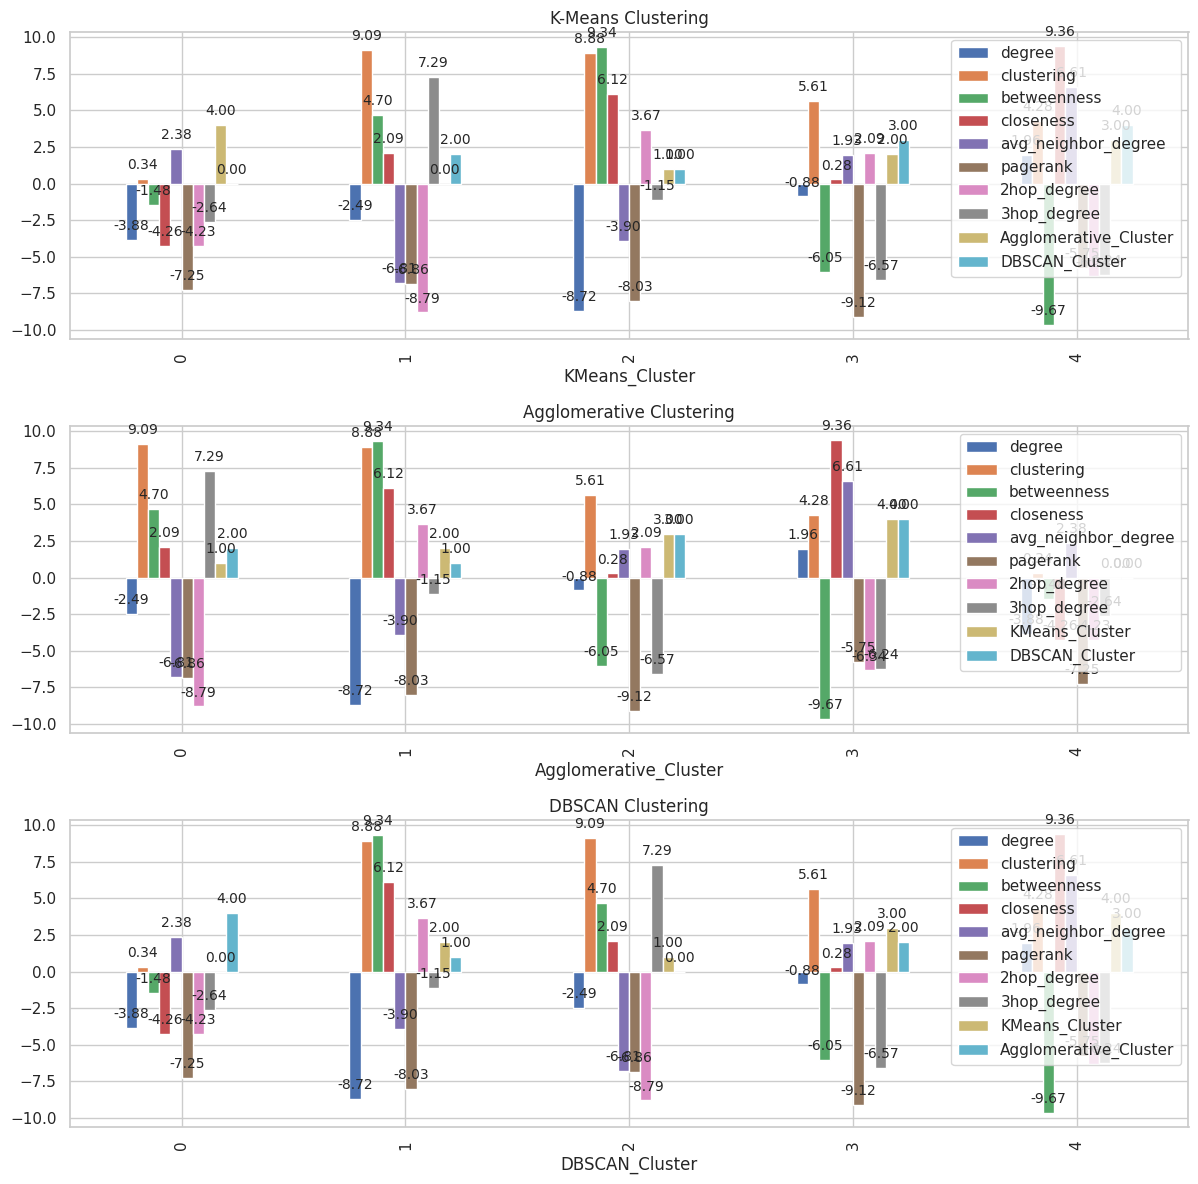

In [48]:
# Plotting cluster means for each feature with annotations
fig, axes = plt.subplots(3, 1, figsize=(12, 12))

# Function to add annotations to the bars
def add_annotations(ax):
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=10, xytext=(0, 10), textcoords='offset points')

# K-Means Clustering
kmeans_means = features.groupby('KMeans_Cluster').mean()
kmeans_means.plot(kind='bar', ax=axes[0], title='K-Means Clustering')
add_annotations(axes[0])

# Agglomerative Clustering
agg_means = features.groupby('Agglomerative_Cluster').mean()
agg_means.plot(kind='bar', ax=axes[1], title='Agglomerative Clustering')
add_annotations(axes[1])

# DBSCAN
dbscan_means = features.groupby('DBSCAN_Cluster').mean()
dbscan_means.plot(kind='bar', ax=axes[2], title='DBSCAN Clustering')
add_annotations(axes[2])

plt.tight_layout()
plt.show()


### FINAL OBSERVATIONS:

**General Insights:**

  * **Consistency Across Algorithms:**
    
      Clusters identified by K-Means, Agglomerative Clustering, and DBSCAN are consistent, indicating stable groupings within the network.Consistency across algorithms provides confidence in the identified clusters.
  * **Cluster Characteristics:**
    1. Nodes with low pagerank values are less influential, while high clustering coefficient nodes form tightly-knit groups.
    2. Nodes with high betweenness are crucial connectors, while high degree and closeness centrality indicate well-connected and central nodes.

**Business Insights can be drawn:**

  1. **User Segmentation:**
      Segmenting the users  based on network roles and connectivity can inform targeted outreach campaigns.

  2. **Identifying Influencers:**
      Nodes with high betweenness and closeness centrality are potential influencers for amplifying messages. Engage with influential users to initiate brand advocacy programs, encouraging them to share positive experiences and endorse products or services within their communities
  3. **Community Engagement:**
      Engaging with tightly-knit communities can foster brand loyalty and trust.